In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
!ls

AnyLogicReader.ipynb                  greater-manchester-latest.osm.pbf
DataVisualisations.ipynb              manch_01_01_26062023_1900.png
Explore_Census_2021.ipynb             manchester_m60.txt
GMAL+Population.xlsx                  manchester_streets_north_west.txt
GM_GAL.png                            map_bolton.xml
GM_Population_under45.png             map_manchester.xml
GoogleMapsScreenshotTest.ipynb        nodes_file.xsd
LSOA_SUMO_net.ipynb                   nominatim.txt
ThemeFeed_1.ipynb                     results.csv
UKRoadsTest.ipynb                     streets_sample.txt
bim                                   sumo-marl-master
connected_lsoa_all.png                template.csv
gm_screenshot_over_osm_gm_streets.png test_plotly.py
gmdata.nosync                         trips.trips.xml
greater-manchester-latest.osm.bz2


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from bim.gis import osm
import geopandas as gpd

In [5]:
# Importing required libraries
from lxml import etree

# Now we define a class
class NodesXML:
    def __init__(self, xml_file=None):
        self.xml_file = xml_file
        if xml_file:
            # Load and parse XML file
            self.tree = etree.parse(xml_file)
            self.root = self.tree.getroot()
        else:
            # Create an empty nodes element
            self.root = etree.Element("nodes")
            self.tree = etree.ElementTree(self.root)

    def add_node(self, id, x, y, type=None):
        # Create a new node element
        node = etree.SubElement(self.root, "node")
        node.set("id", id)
        node.set("x", str(x))
        node.set("y", str(y))
        if type is not None:
            node.set("type", type)

    def save(self, path):
        # Save the XML to a file
        self.tree.write(path, pretty_print=True)

    def tostring(self):
        # Return a string representation of the XML
        return etree.tostring(self.root, pretty_print=True).decode()

    def load(self, xml_file):
        # Load and parse XML file
        self.tree = etree.parse(xml_file)
        self.root = self.tree.getroot()
        self.xml_file = xml_file

    def get_nodes(self):
        # Get all nodes as a list of dictionaries
        nodes = []
        for node in self.root.findall("node"):
            nodes.append({
                "id": node.get("id"),
                "x": node.get("x"),
                "y": node.get("y"),
                "type": node.get("type")
            })
        return nodes

# Let's test the NodesXML class
nodes_xml = NodesXML()
nodes_xml.add_node("n1", 0, 0, "traffic_light")
nodes_xml.add_node("n2", 1, 1)
print(nodes_xml.tostring())
nodes_xml.save("gmdata.nosync/test_nodes.xml")

<nodes>
  <node id="n1" x="0" y="0" type="traffic_light"/>
  <node id="n2" x="1" y="1"/>
</nodes>



In [6]:
# nodes_xml = NodesXML("gmdata.nosync/test_nodes.xml")

In [7]:
# print(nodes_xml.tostring())

In [8]:
# list(nodes_xml.tree.getroot())[0].get('id')

In [9]:
import pyxb

In [10]:
from bim.sumo import binding as sumo_xml_binding

In [11]:
with open('bim/data/sample.net.xml') as f:
    my_sumo_xml_net = sumo_xml_binding.CreateFromDocument('\n'.join(f.readlines()))

In [2]:
# dir(my_sumo_xml_net)

In [3]:
# dir(list(my_sumo_xml_net.edge)[0])

In [14]:
# import the library
import sumolib
# parse the net
net = sumolib.net.readNet('bim/data/sample.net.xml')

In [15]:
net.getEdges()

[<edge id="-E0" from="intersection_1" to="intersection_0"/>,
 <edge id="-E1" from="intersection_2" to="intersection_3"/>,
 <edge id="-E10" from="J10" to="intersection_3"/>,
 <edge id="-E11" from="J11" to="intersection_3"/>,
 <edge id="-E2" from="intersection_2" to="intersection_0"/>,
 <edge id="-E3" from="intersection_3" to="intersection_1"/>,
 <edge id="-E4" from="J4" to="intersection_2"/>,
 <edge id="-E5" from="J5" to="intersection_2"/>,
 <edge id="-E6" from="J6" to="intersection_0"/>,
 <edge id="-E7" from="J7" to="intersection_0"/>,
 <edge id="-E8" from="J8" to="intersection_1"/>,
 <edge id="-E9" from="J9" to="intersection_1"/>,
 <edge id="E0" from="intersection_0" to="intersection_1"/>,
 <edge id="E1" from="intersection_3" to="intersection_2"/>,
 <edge id="E10" from="intersection_3" to="J10"/>,
 <edge id="E11" from="intersection_3" to="J11"/>,
 <edge id="E2" from="intersection_0" to="intersection_2"/>,
 <edge id="E3" from="intersection_1" to="intersection_3"/>,
 <edge id="E4" from=

In [4]:
# dir(net)

In [19]:
osm.Nominatim().parse_street("""(29270131, 'Kearsley Interchange', 'POINT(-2.3852625 53.5470489)')""")

In [20]:
osm.Nominatim().parse_street("""(554321812, 'Bolton Road', 'LINESTRING(-2.3815276 53.5418358,-2.3817707 53.5419047,-2.3818233 53.5419195,-2.3822453 53.542038,-2.3826206 53.5421584,-2.3826765 53.5421764,-2.382974 53.5422726,-2.3833405 53.5423939,-2.3849496 53.5429316,-2.3850697 53.5429756)')""")

(554321812,
 'Bolton Road',
 [['-2.3815276', '53.5418358'],
  ['-2.3817707', '53.5419047'],
  ['-2.3818233', '53.5419195'],
  ['-2.3822453', '53.542038'],
  ['-2.3826206', '53.5421584'],
  ['-2.3826765', '53.5421764'],
  ['-2.382974', '53.5422726'],
  ['-2.3833405', '53.5423939'],
  ['-2.3849496', '53.5429316'],
  ['-2.3850697', '53.5429756']])

In [21]:
from bim.gis.traffic import gmal

In [22]:
gmal_population_df = gmal.GMAL().load()

In [23]:
gmal_population_df.columns

Index(['area_code', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'area_name', 'census_geography', 'all_residents_2011',
       'area_ha', 'density_2011', 'centroid_x', 'centroid_y',
       'is_bad_area_2011', 'Unnamed: 14', 'Population_2021', 'density_2021',
       'is_bad_area_2021', 'Unnamed: 18', 'population_2011_2021, %',
       'gmal_pos_formula', 'gmal_pos_value', 'gmal_score',
       'is_bad_area_2011.1', 'GMAL_threshold', 'Unnamed: 25',
       'bad_area_ratio, %', 'bad_area_ratio, %.1', 'Population_threshold_2011',
       'Population_threshold_2021', 'GMAL_min', 'GMAL_max'],
      dtype='object')

In [24]:
gmal_population_df[['area_code','all_residents_2011']]

area_code  all_residents_2011
0     E01004794              1775.0
1     E01004795              1498.0
2     E01004796              1494.0
3     E01004797              1371.0
4     E01004798              1652.0
...         ...                 ...
2895  E01033686              1265.0
2896  E01033687              1417.0
2897        NaN                 NaN
2898        NaN                 NaN
2899        NaN                 NaN

[2900 rows x 2 columns]

In [25]:
from bim.gis.traffic import od_matrix

In [26]:
area_od_matrix = od_matrix.AreaOriginDistanceMatrix()

In [27]:
od_gm_list = area_od_matrix.load()

In [28]:
from bim.gis.traffic import analytics

In [29]:
od_matrix_analysis = analytics.ODMatrixAnalysis()

In [30]:
# od_matrix_analysis.compare_population_and_od_commuter_numbers('bus')

In [31]:
# od_matrix_analysis.compare_population_and_od_commuter_numbers()

In [32]:
top_manch_routes = od_gm_list[(od_gm_list['lad_name1'] == 'Manchester') & 
              (od_gm_list['geo_code2'].apply(lambda x: x.startswith('E')))]\
.sort_values('all', ascending=False)

In [33]:
top_manch_routes_codes = top_manch_routes['geo_code1'].unique()

In [36]:
gm_geocodes = set(od_gm_list['geo_code1'])

In [37]:
len(gm_geocodes)

1946

In [40]:
with open('gmdata.nosync/greater_manchester_streets.txt', 'r') as f:
    streets = list(filter(None, map(osm.Nominatim().parse_street, f.readlines())))

In [ ]:
# with open('manchester_m60.txt', 'r') as f:
#     streets = list(filter(None, map(osm.Nominatim().parse_street, f.readlines())))

In [ ]:
# with open('manchester_streets_north_west.txt', 'r') as f:
#     streets = list(filter(None, map(osm.Nominatim().parse_street, f.readlines())))

In [43]:
lsoa_boundaries_gdf = gpd.read_file('gmdata.nosync/infuse_lsoa_lyr_2011.shp')

In [44]:
len(lsoa_boundaries_gdf)

42619

In [45]:
lsoa_boundaries_gdf

geo_code                 geo_label geo_labelw  \
0      E01003513               Newham 035D        NaN   
1      E01031647              Horsham 002D        NaN   
2      E01022006             Tendring 002C        NaN   
3      E01001159              Croydon 002C        NaN   
4      E01008088            Sheffield 012B        NaN   
...          ...                       ...        ...   
42614  E01029200       South Somerset 004A        NaN   
42615  E01003084              Lambeth 030B        NaN   
42616  E01020517          West Dorset 007B        NaN   
42617  E01004020            Southwark 029D        NaN   
42618  E01023636  North Hertfordshire 003B        NaN   

                             label                      name  \
0      E92000001E09000025E01003513               Newham 035D   
1      E92000001E07000227E01031647              Horsham 002D   
2      E92000001E07000076E01022006             Tendring 002C   
3      E92000001E09000008E01001159              Croydon 002C   
4      E92000001E08000019E01008088            Sheffield 012B   
...                            ...                       ...   
42614  E92000001E07000189E01029200       South Somerset 004A   
42615  E92000001E09000022E01003084              Lambeth 030B   
42616  E92000001E07000052E01020517          West Dorset 007B   
42617  E92000001E09000028E01004020            Southwark 029D   
42618  E92000001E07000099E01023636  North Hertfordshire 003B   

                                                geometry  
0      POLYGON ((541893.189 181249.621, 541900.568 18...  
1      POLYGON ((518376.682 132574.695, 518375.785 13...  
2      POLYGON ((623754.716 231042.037, 623759.750 23...  
3      POLYGON ((532233.977 170474.976, 532229.824 17...  
4      POLYGON ((433539.233 392096.845, 433539.125 39...  
...                                                  ...  
42614  POLYGON ((341784.812 127223.499, 341826.628 12...  
42615  POLYGON ((531528.786 171783.590, 531526.879 17...  
42616  POLYGON ((343718.406 91175.102, 343702.812 911...  
42617  POLYGON ((534979.720 175304.033, 534980.950 17...  
42618  POLYGON ((522238.664 234525.390, 522247.817 23...  

[42619 rows x 6 columns]

In [46]:
'E01005062' in set(lsoa_boundaries_gdf['geo_code'])

True

In [47]:
len(streets)

80387

In [48]:
len(set(od_gm_list['geo_code1']))

1946

In [49]:
len(gm_geocodes)

1946

In [53]:
counties_region_gdf = gpd.read_file("gmdata.nosync/Boundary-line-ceremonial-counties_region.shp")

In [54]:
counties_region_gdf

NAME         DESCRIPTIO  \
0      Bedfordshire  Ceremonial County   
1         Berkshire  Ceremonial County   
2   Buckinghamshire  Ceremonial County   
3    Cambridgeshire  Ceremonial County   
4          Cheshire  Ceremonial County   
..              ...                ...   
86    Western Isles  Ceremonial County   
87           Orkney  Ceremonial County   
88         Shetland  Ceremonial County   
89         Cornwall  Ceremonial County   
90  Argyll and Bute  Ceremonial County   

                                             geometry  
0   POLYGON ((527179.004 248224.996, 527162.003 24...  
1   POLYGON ((504919.202 178392.095, 504918.798 17...  
2   POLYGON ((505704.800 185453.304, 505704.800 18...  
3   POLYGON ((571833.397 261707.896, 571813.898 26...  
4   POLYGON ((401780.298 370227.103, 401778.600 37...  
..                                                ...  
86  MULTIPOLYGON (((152467.798 935008.696, 152466....  
87  MULTIPOLYGON (((358840.094 1005993.747, 358836...  
88  MULTIPOLYGON (((452147.497 1206082.502, 452148...  
89  MULTIPOLYGON (((234782.596 86837.002, 234797.0...  
90  MULTIPOLYGON (((239380.496 750213.503, 239403....  

[91 rows x 3 columns]

<Axes: >

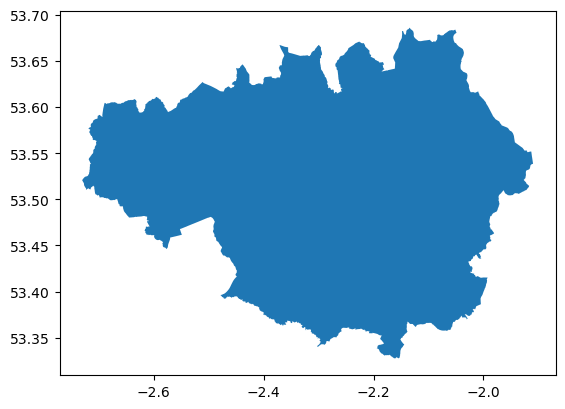

In [55]:
gm_boundary = counties_region_gdf[counties_region_gdf['NAME'].apply(lambda x: 'manchester' in x.lower())]
gm_boundary = gm_boundary.to_crs(epsg=4326)
gm_boundary.plot()

In [56]:
gm_boundary_poly = gm_boundary['geometry'].iloc[0]

In [57]:
gm_lsoa_boundaries_gdf = lsoa_boundaries_gdf[lsoa_boundaries_gdf.to_crs(epsg=4326).apply(lambda x: x['geo_code'] in gm_geocodes and 
                                                                x['geometry'].within(gm_boundary_poly), axis=1)]
gm_lsoa_boundaries_gdf = gm_lsoa_boundaries_gdf.to_crs(epsg=4326)

In [58]:
%%time
connected = area_od_matrix.find_connected_by_streets(streets, gm_lsoa_boundaries_gdf)

CPU times: user 9min 10s, sys: 1min 1s, total: 10min 11s
Wall time: 10min 31s


In [60]:
import json

In [64]:
with open('gmdata.nosync/lsoa_connections.json', 'w+') as f:
    json.dump(list(connected), f)

In [ ]:
len(connected) / ((len(gm_geocodes) ** 2) / 2)

In [ ]:
connected

In [ ]:
code1, code2 = list(connected)[0]

In [ ]:
# # Define the latitude and longitude of the two points
# lat1, lon1 = 51.5074, -0.1278  # London, for example
# lat2, lon2 = 48.8566, 2.3522   # Paris, for example

# # Create a new figure
# plt.figure()

# # Plot the points
# plt.plot([lon1, lon2], [lat1, lat2], 'o-')

In [ ]:
def get_lsoa(code):
    return lsoa_boundaries_gdf[lsoa_boundaries_gdf['geo_code'] == code].to_crs(epsg=4326)


fig, ax = plt.subplots(1, 1, figsize=(20,20))

# lsoa_gm_boundary.plot(aspect=1, ax=ax)
# lsoa_boundaries_gdf[lsoa_boundaries_gdf['geo_code'] == from_code].to_crs(epsg=4326).plot(aspect=1, ax=ax, color='r')
gm_boundary.plot(ax=ax, alpha=0.2)
for code1, code2 in list(connected):
    if not code1 or not code2:
        continue
    lsoa1 = get_lsoa(code1)
    lsoa2 = get_lsoa(code2)
    lsoa1.plot(ax=ax)
    lsoa2.plot(ax=ax)
    lon1, lat1 = list(lsoa1.iloc[0].geometry.centroid.coords)[0]
    lon2, lat2 = list(lsoa2.iloc[0].geometry.centroid.coords)[0]
    plt.plot([lon1, lon2], [lat1, lat2], 'o-')
# plt.show()
plt.savefig('connected_lsoa_all.png')

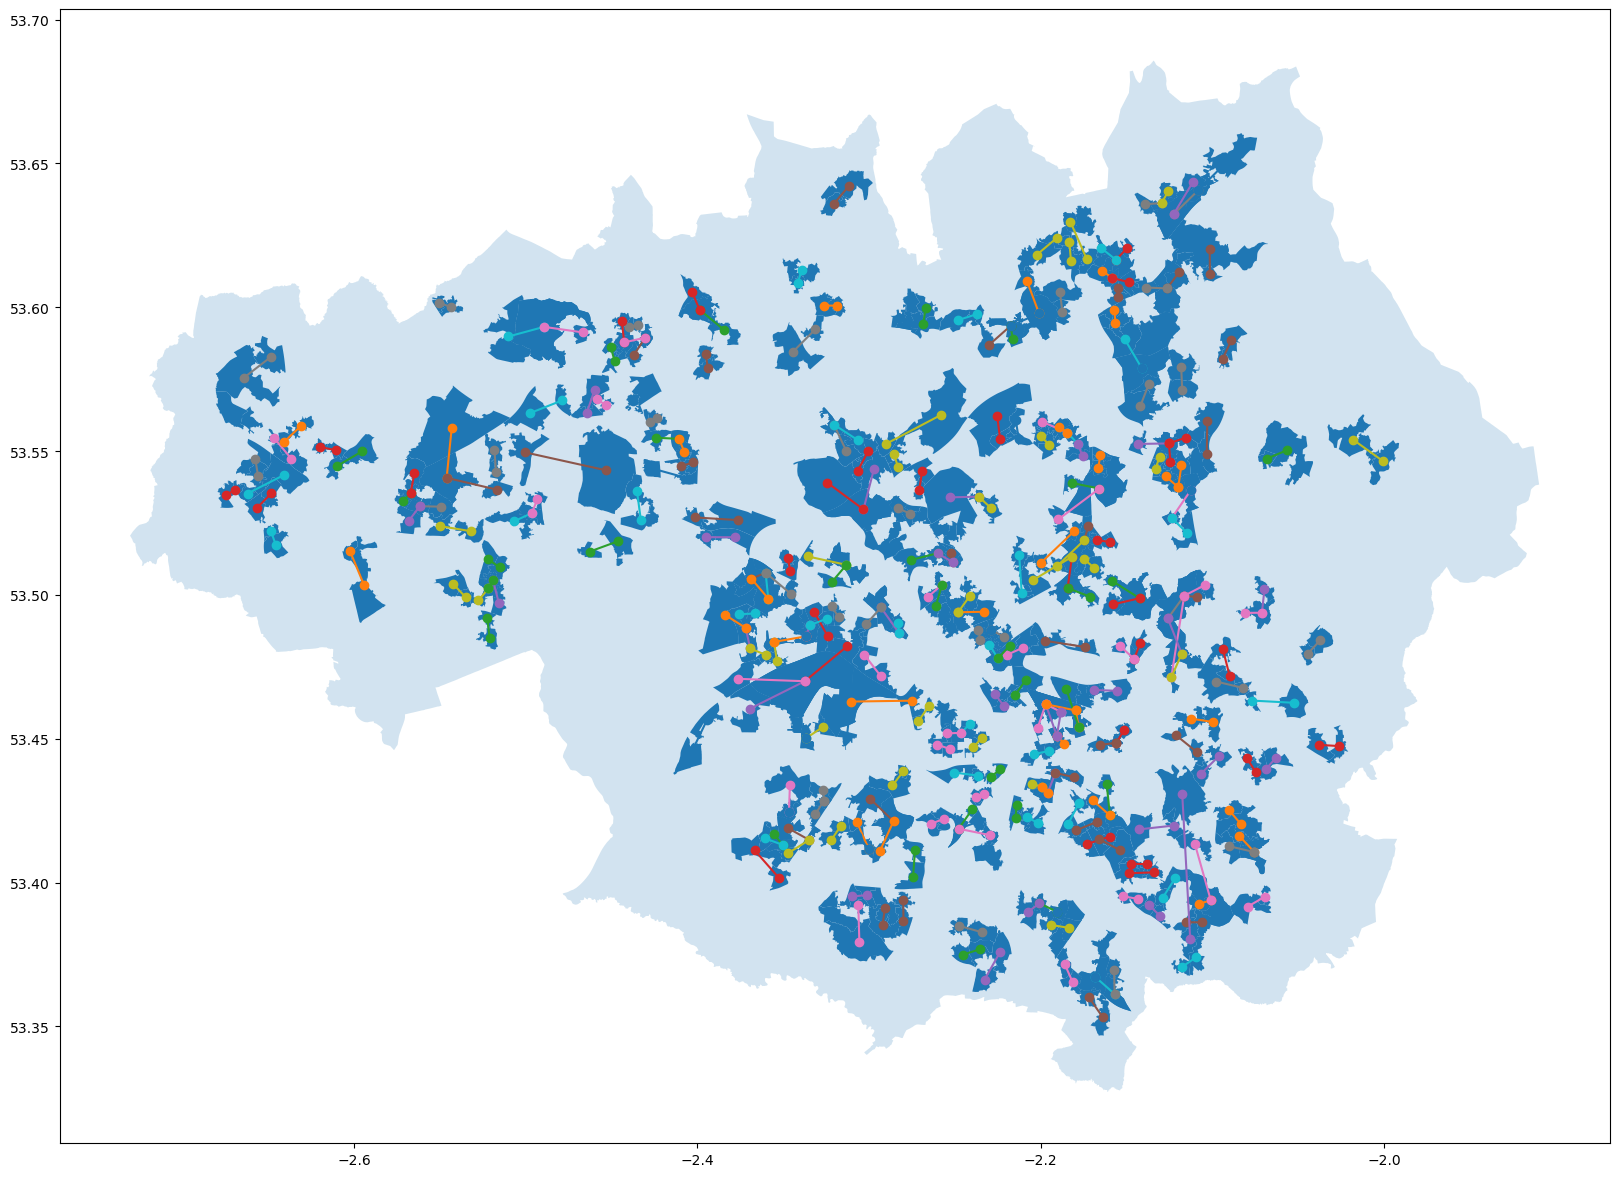

In [688]:
def get_lsoa(code):
    return lsoa_boundaries_gdf[lsoa_boundaries_gdf['geo_code'] == code].to_crs(epsg=4326)


fig, ax = plt.subplots(1, 1, figsize=(20,20))

# lsoa_gm_boundary.plot(aspect=1, ax=ax)
# lsoa_boundaries_gdf[lsoa_boundaries_gdf['geo_code'] == from_code].to_crs(epsg=4326).plot(aspect=1, ax=ax, color='r')
gm_boundary.plot(ax=ax, alpha=0.2)
for code1, code2 in list(connected)[:300]:
    if not code1 or not code2:
        continue
    lsoa1 = get_lsoa(code1)
    lsoa2 = get_lsoa(code2)
    lsoa1.plot(ax=ax)
    lsoa2.plot(ax=ax)
    lon1, lat1 = list(lsoa1.iloc[0].geometry.centroid.coords)[0]
    lon2, lat2 = list(lsoa2.iloc[0].geometry.centroid.coords)[0]
    plt.plot([lon1, lon2], [lat1, lat2], 'o-')
plt.show()

In [639]:
'E01005574' in set(lsoa_boundaries_gdf['geo_code'])

True

In [580]:
lsoas_sindex = gm_lsoa_boundaries_gdf.sindex

In [583]:
from shapely.geometry import Point

In [591]:
np.asarray(possible_matches_index)[:,0]

array([  0, 938])

In [600]:
precise_matches

geo_code    geo_label geo_labelw                        label  \
20744  E01004905  Bolton 034C        NaN  E92000001E08000001E01004905   

              name                                           geometry  
20744  Bolton 034C  POLYGON ((-2.38486 53.54384, -2.38496 53.54390...

In [605]:
p = Point(-2.3815276, 53.5418358)
possible_matches_index = list(lsoas_sindex.nearest(p))
possible_matches = gm_lsoa_boundaries_gdf.iloc[np.asarray(possible_matches_index)[:,0]]
precise_matches = possible_matches[possible_matches.intersects(p)]

# If there are any precise matches, store the LSOA code of the first one
if not precise_matches.empty:
    res = precise_matches.iloc[0]['geo_code']

965 µs ± 57.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [594]:
np.asarray(possible_matches_index)[:,0]

array([  0, 938])

In [596]:
gm_lsoa_boundaries_gdf.iloc[np.asarray(possible_matches_index)[:,0]]

geo_code    geo_label geo_labelw                        label  \
18     E01006351   Wigan 010B        NaN  E92000001E08000010E01006351   
20744  E01004905  Bolton 034C        NaN  E92000001E08000001E01004905   

              name                                           geometry  
18      Wigan 010B  POLYGON ((-2.66745 53.53855, -2.66745 53.53855...  
20744  Bolton 034C  POLYGON ((-2.38486 53.54384, -2.38496 53.54390...

In [330]:
# lsoa_boundaries_gdf[lsoa_boundaries_gdf.to_crs(epsg=4326).apply(lambda x: x['LSOA21CD'] not in gm_geocodes and 
#                                                                 x['geometry'].within(gm_boundary_poly), axis=1)]

In [ ]:
vehicle_columns = ['all', 'bicycle', 'foot', 'car_driver', 'car_driver', 'motorbike', 'train_tube', 'bus']

In [441]:
def plot_od_from(from_code):
    from_E01005107 = od_gm_list[od_gm_list['geo_code1'] == from_code].copy()
    from_E01005107_codes = set(from_E01005107['geo_code2'])

    lsoa_gm_boundary = lsoa_boundaries_gdf[lsoa_boundaries_gdf['geo_code'].apply(lambda x: x in from_E01005107_codes)]
    lsoa_gm_boundary = lsoa_gm_boundary.to_crs(epsg=4326)
    gm_boundary_poly = gm_boundary['geometry'].iloc[0]
    lsoa_gm_boundary = lsoa_gm_boundary[
        lsoa_gm_boundary['geometry'].apply(lambda x: x.within(gm_boundary_poly))
    ]
    from_E01005107.loc[:, 'geo_code'] = from_E01005107['geo_code2']
    lsoa_gm_boundary = lsoa_gm_boundary.merge(from_E01005107[['geo_code'] + vehicle_columns], on='geo_code')
    fig, ax = plt.subplots(1, 1, figsize=(20,20))

    lsoa_gm_boundary.plot(aspect=1, ax=ax, column='all', cmap='coolwarm', legend=False)
    lsoa_boundaries_gdf[lsoa_boundaries_gdf['geo_code'] == from_code].to_crs(epsg=4326).plot(aspect=1, ax=ax, color='r')
    gm_boundary.plot(ax=ax, alpha=0.2)

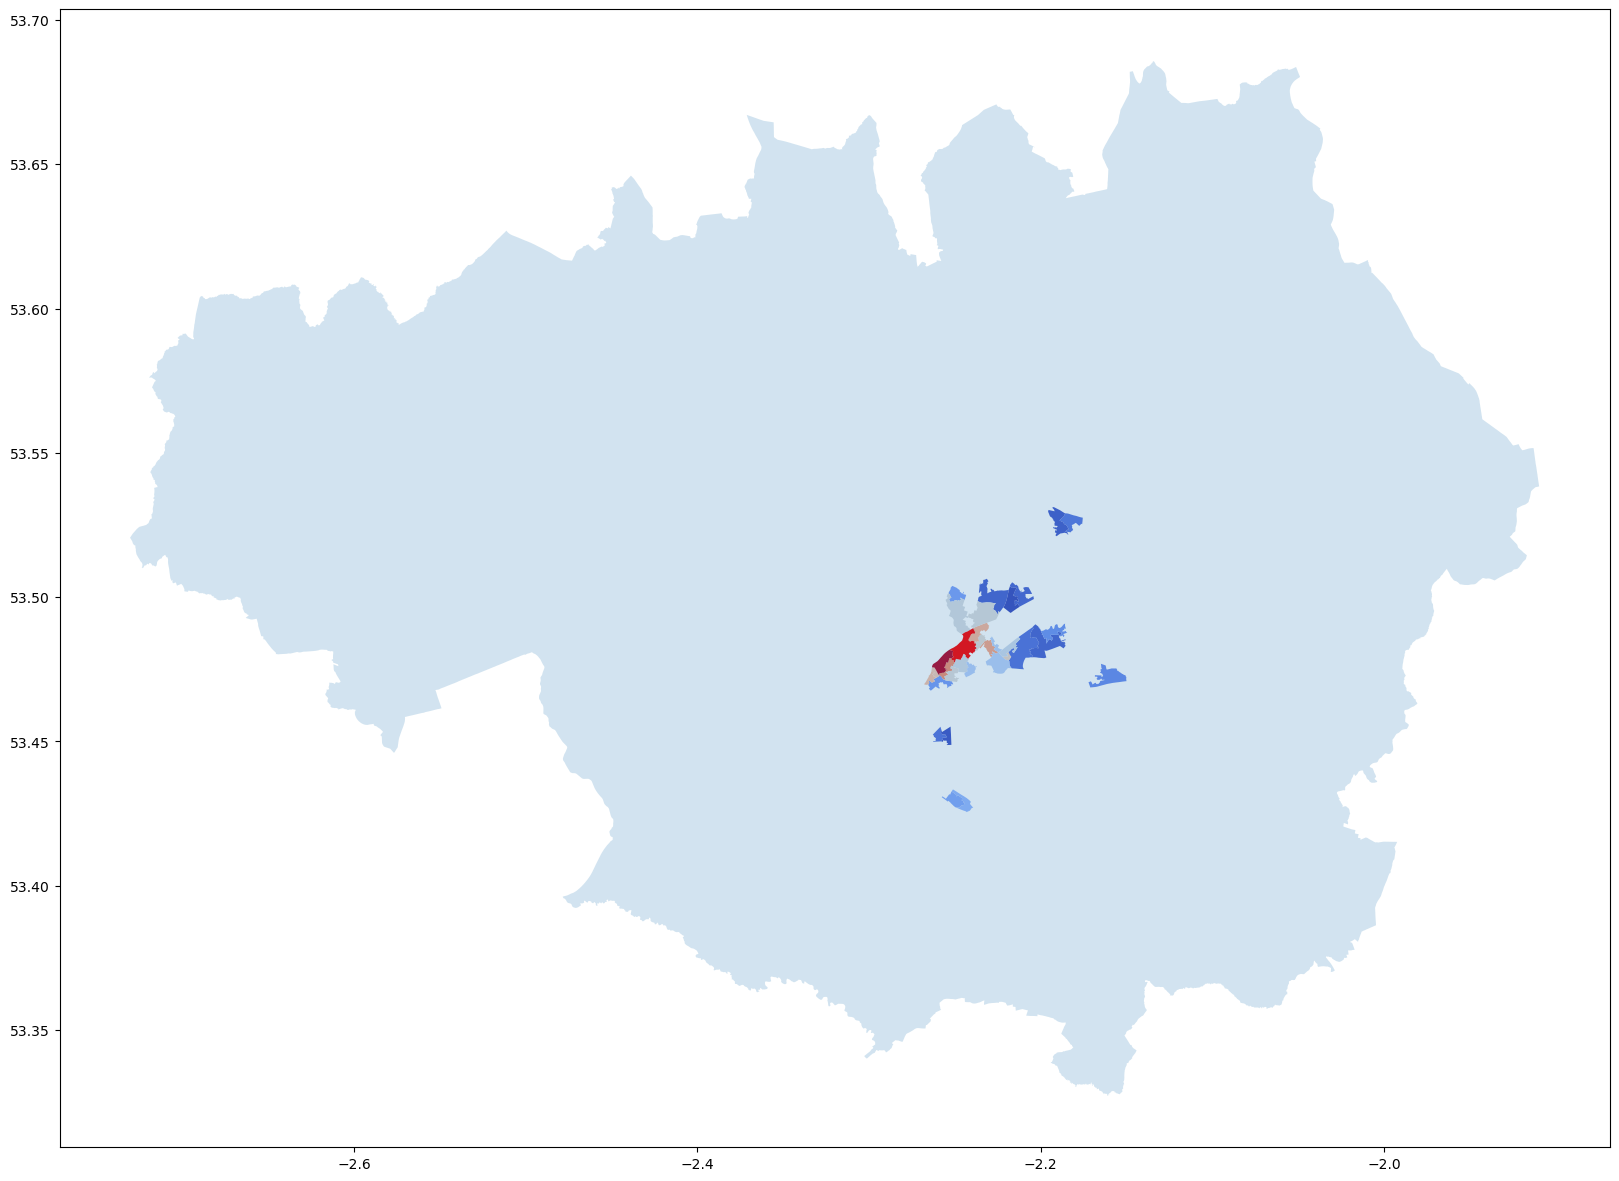

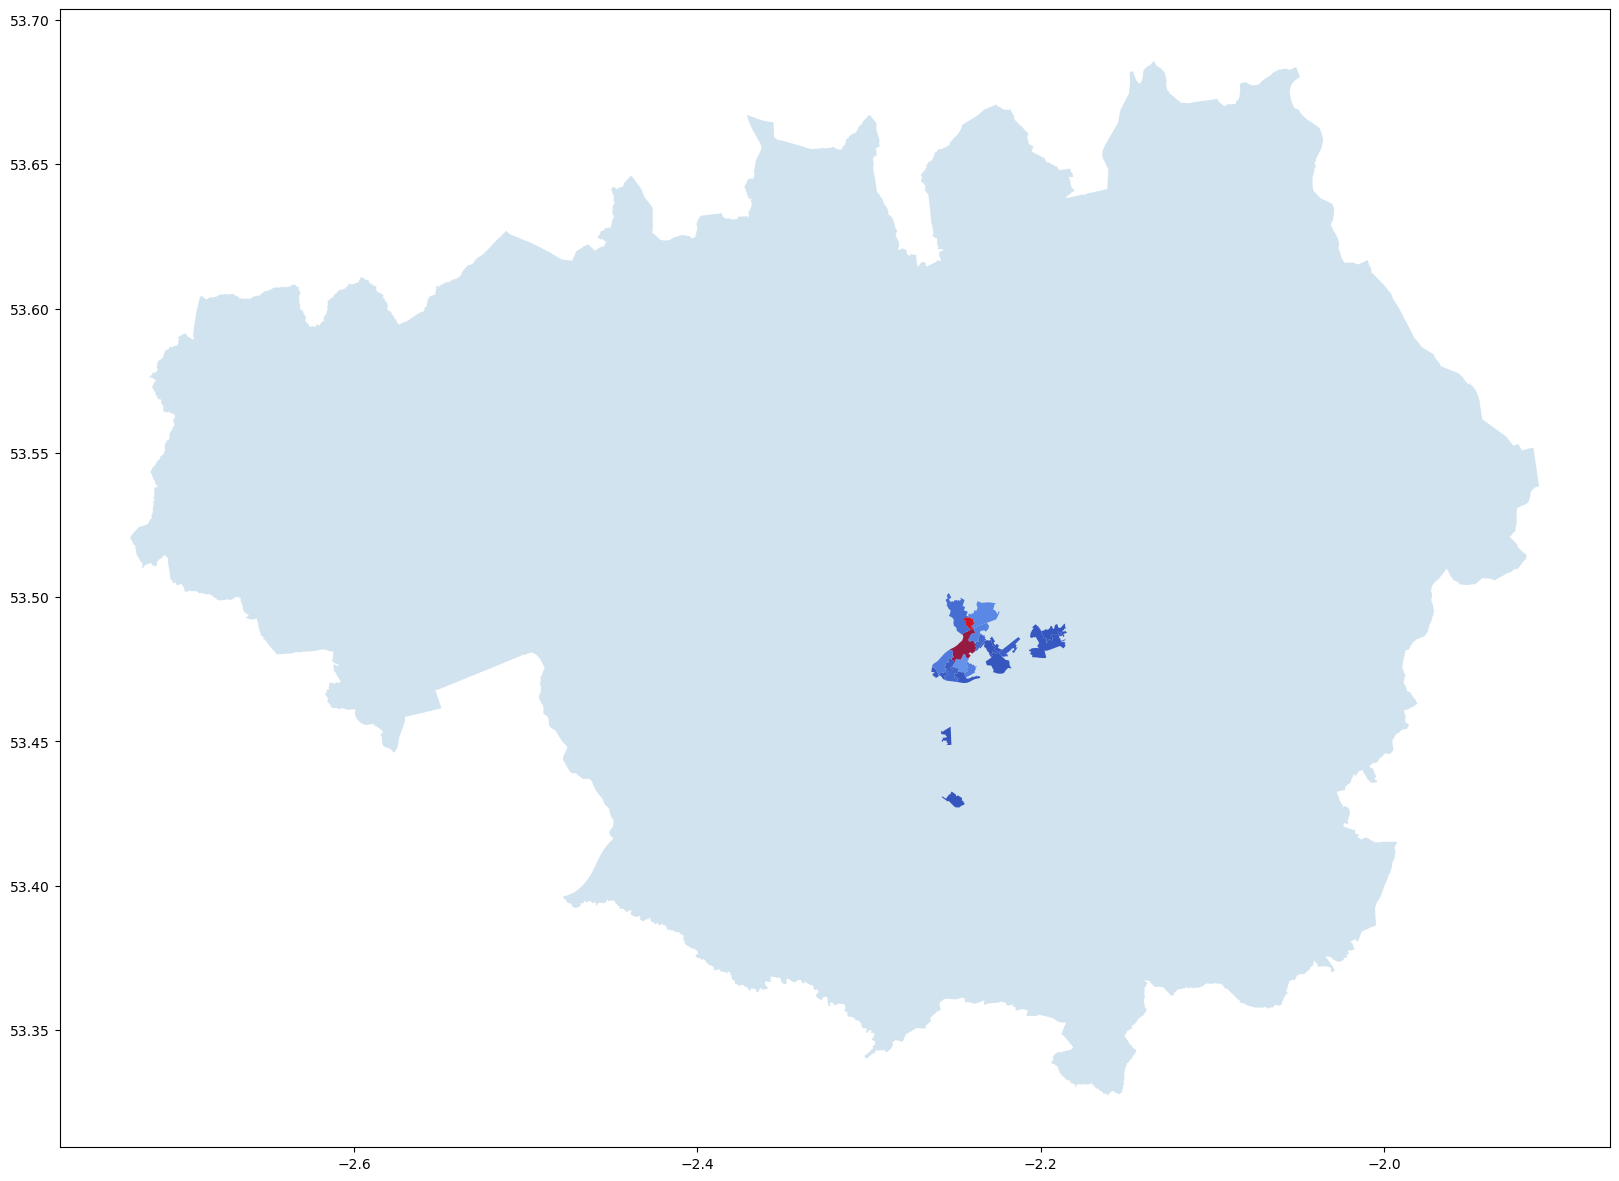

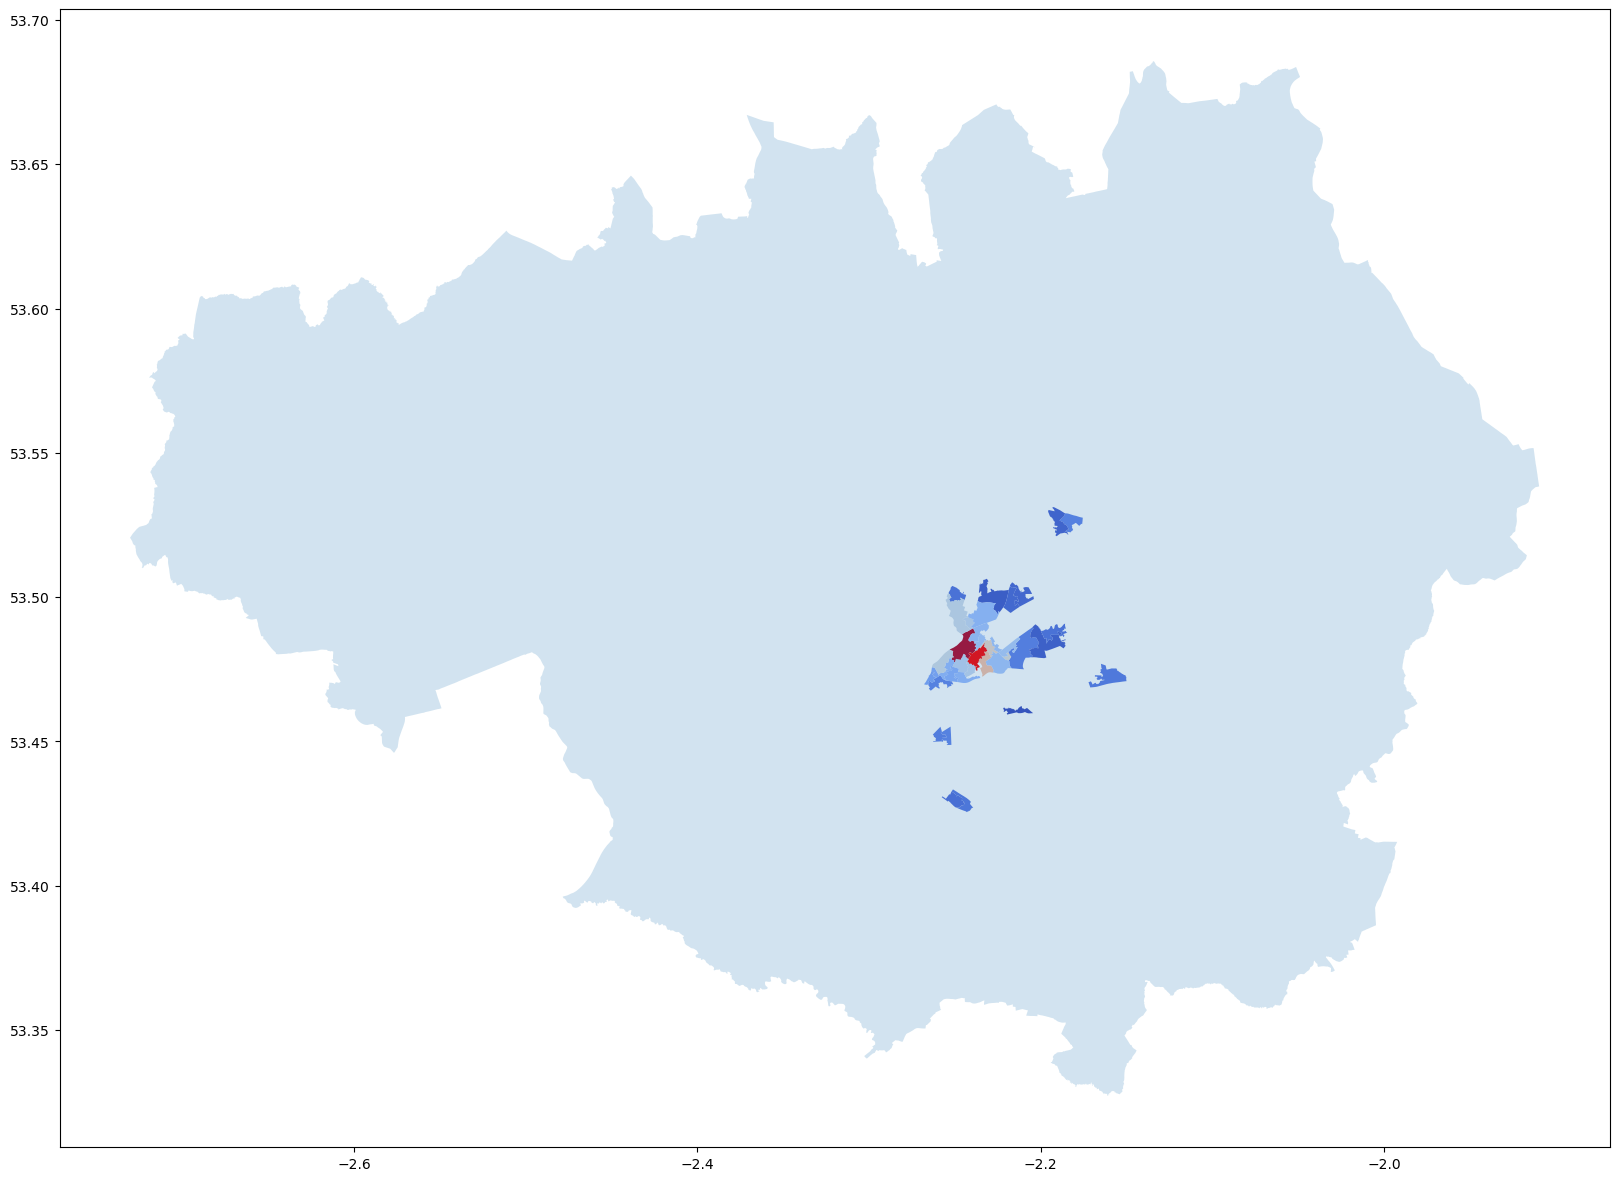

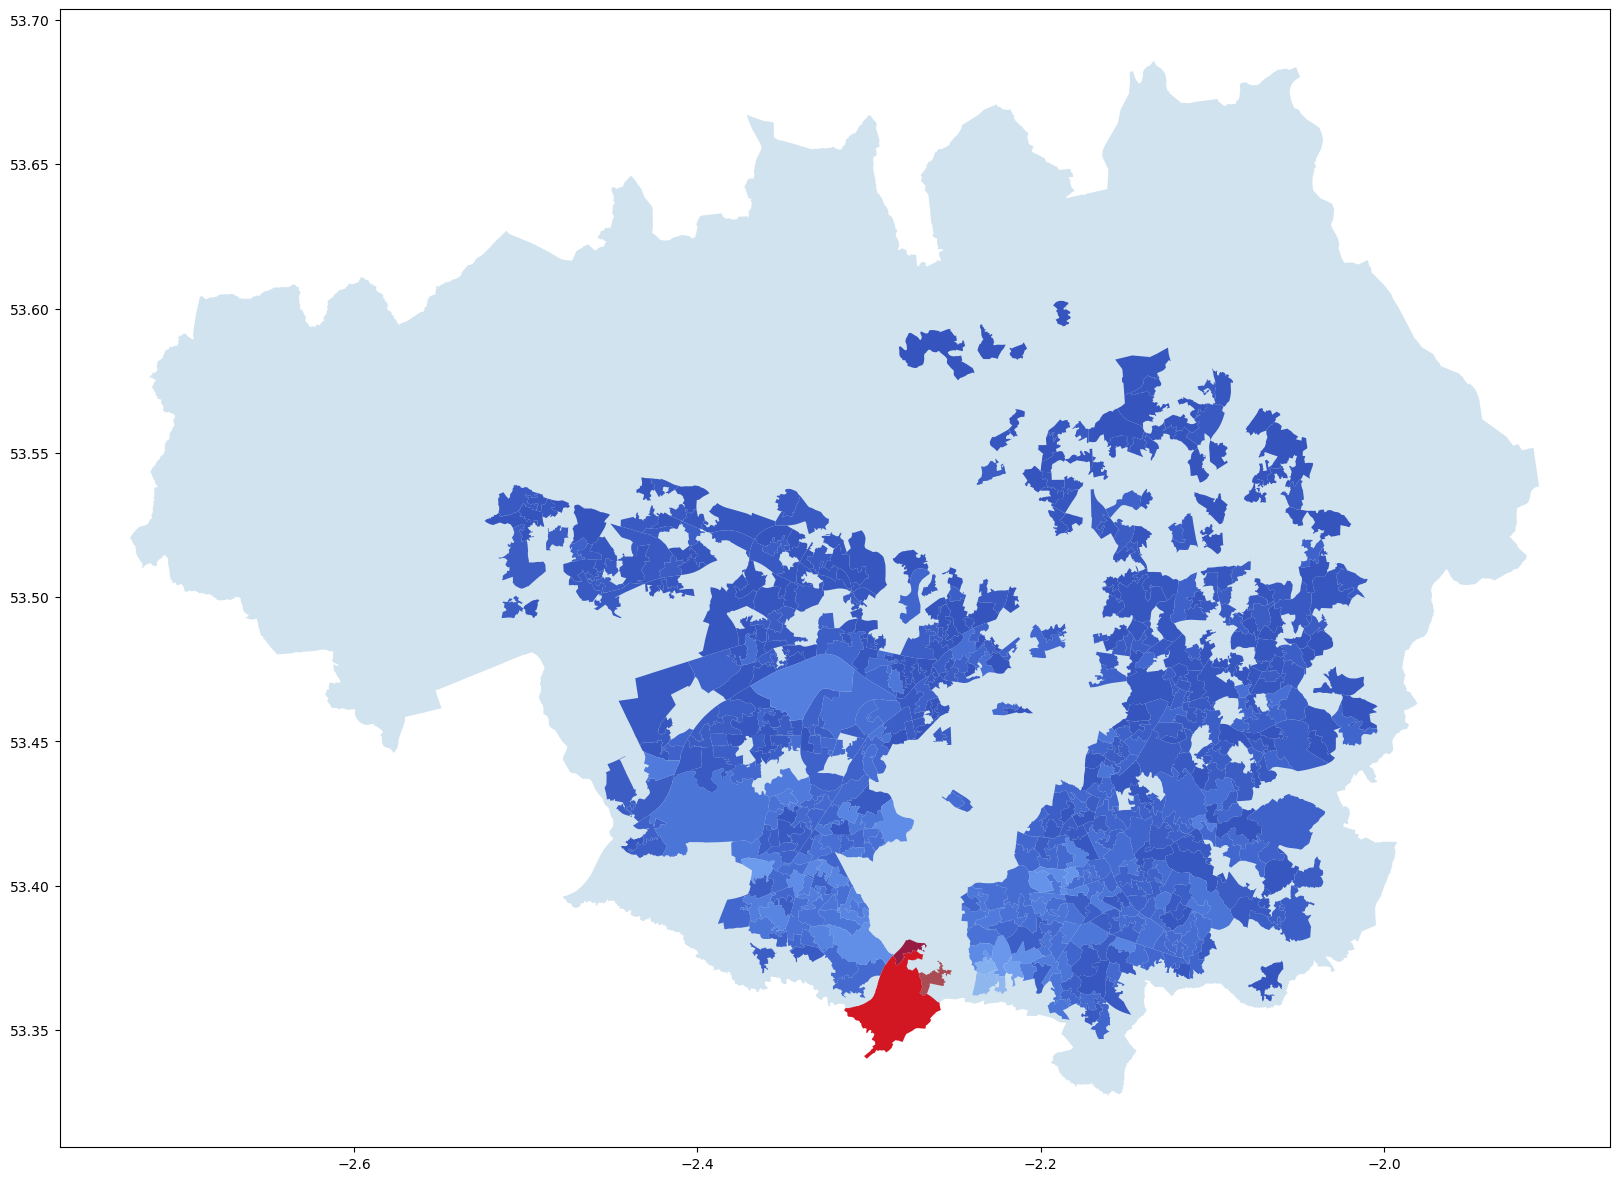

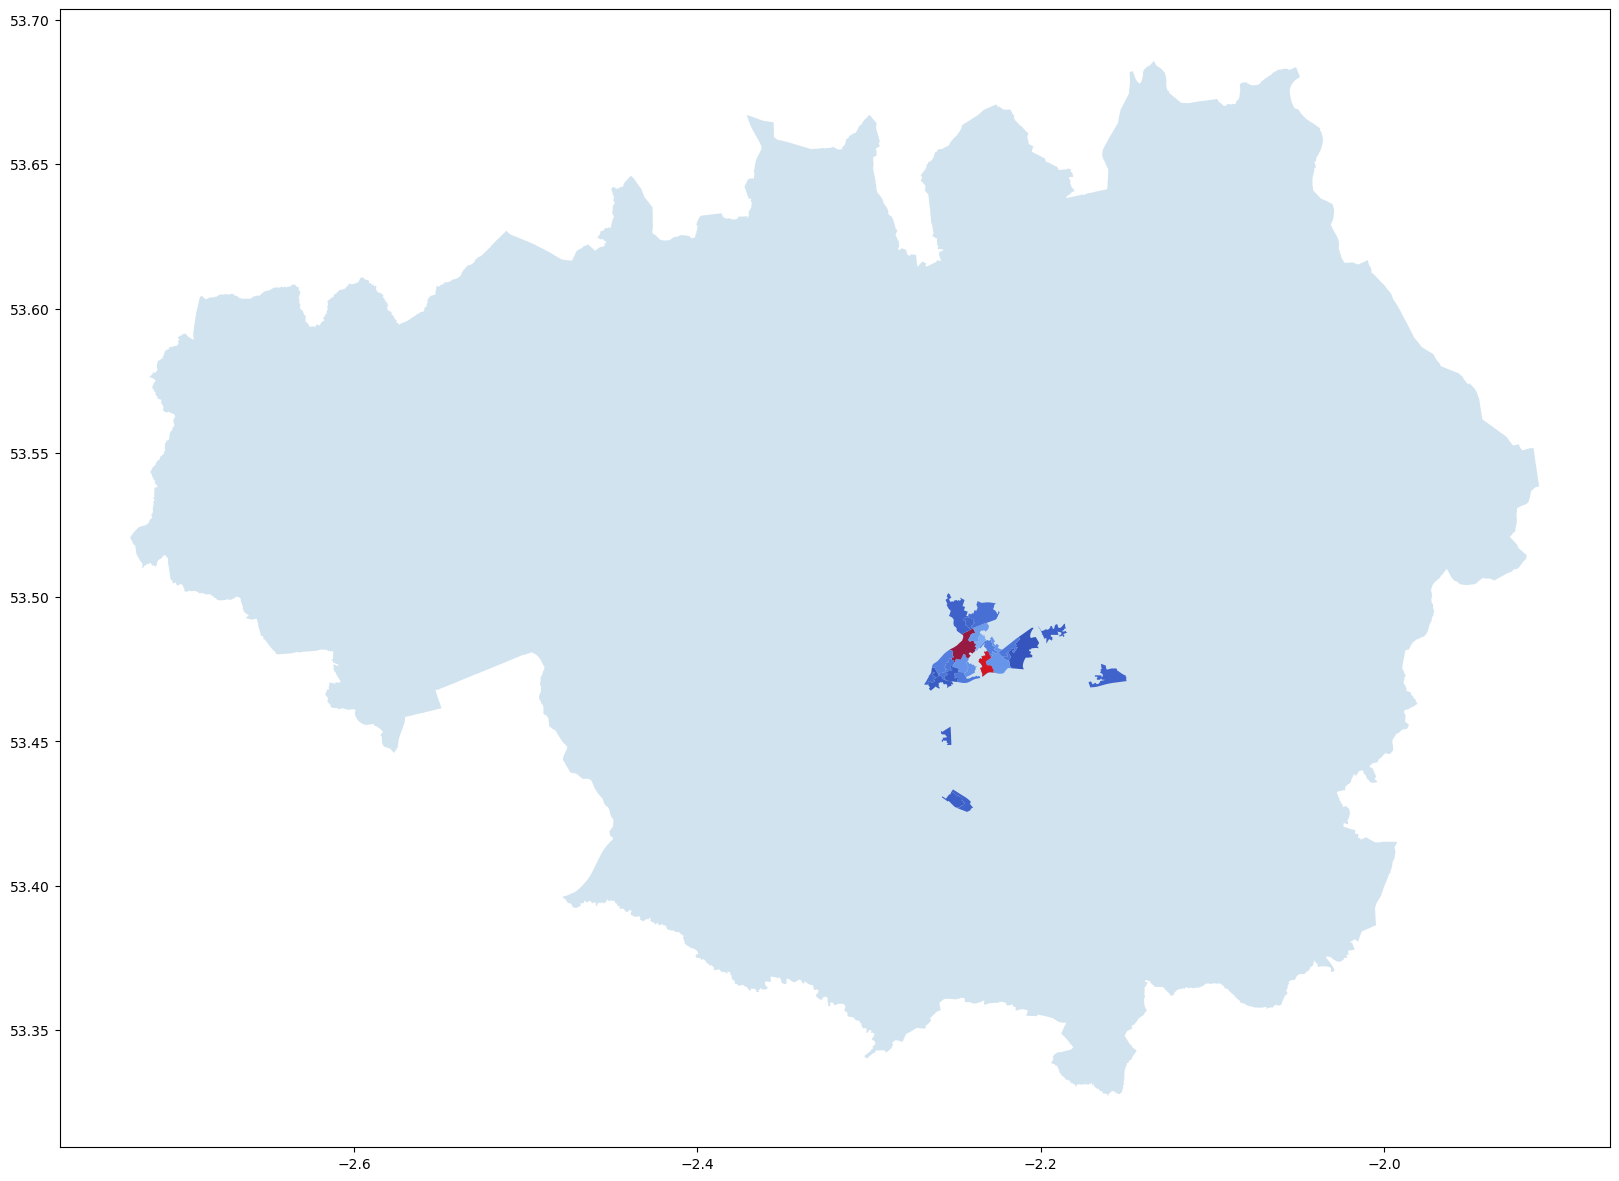

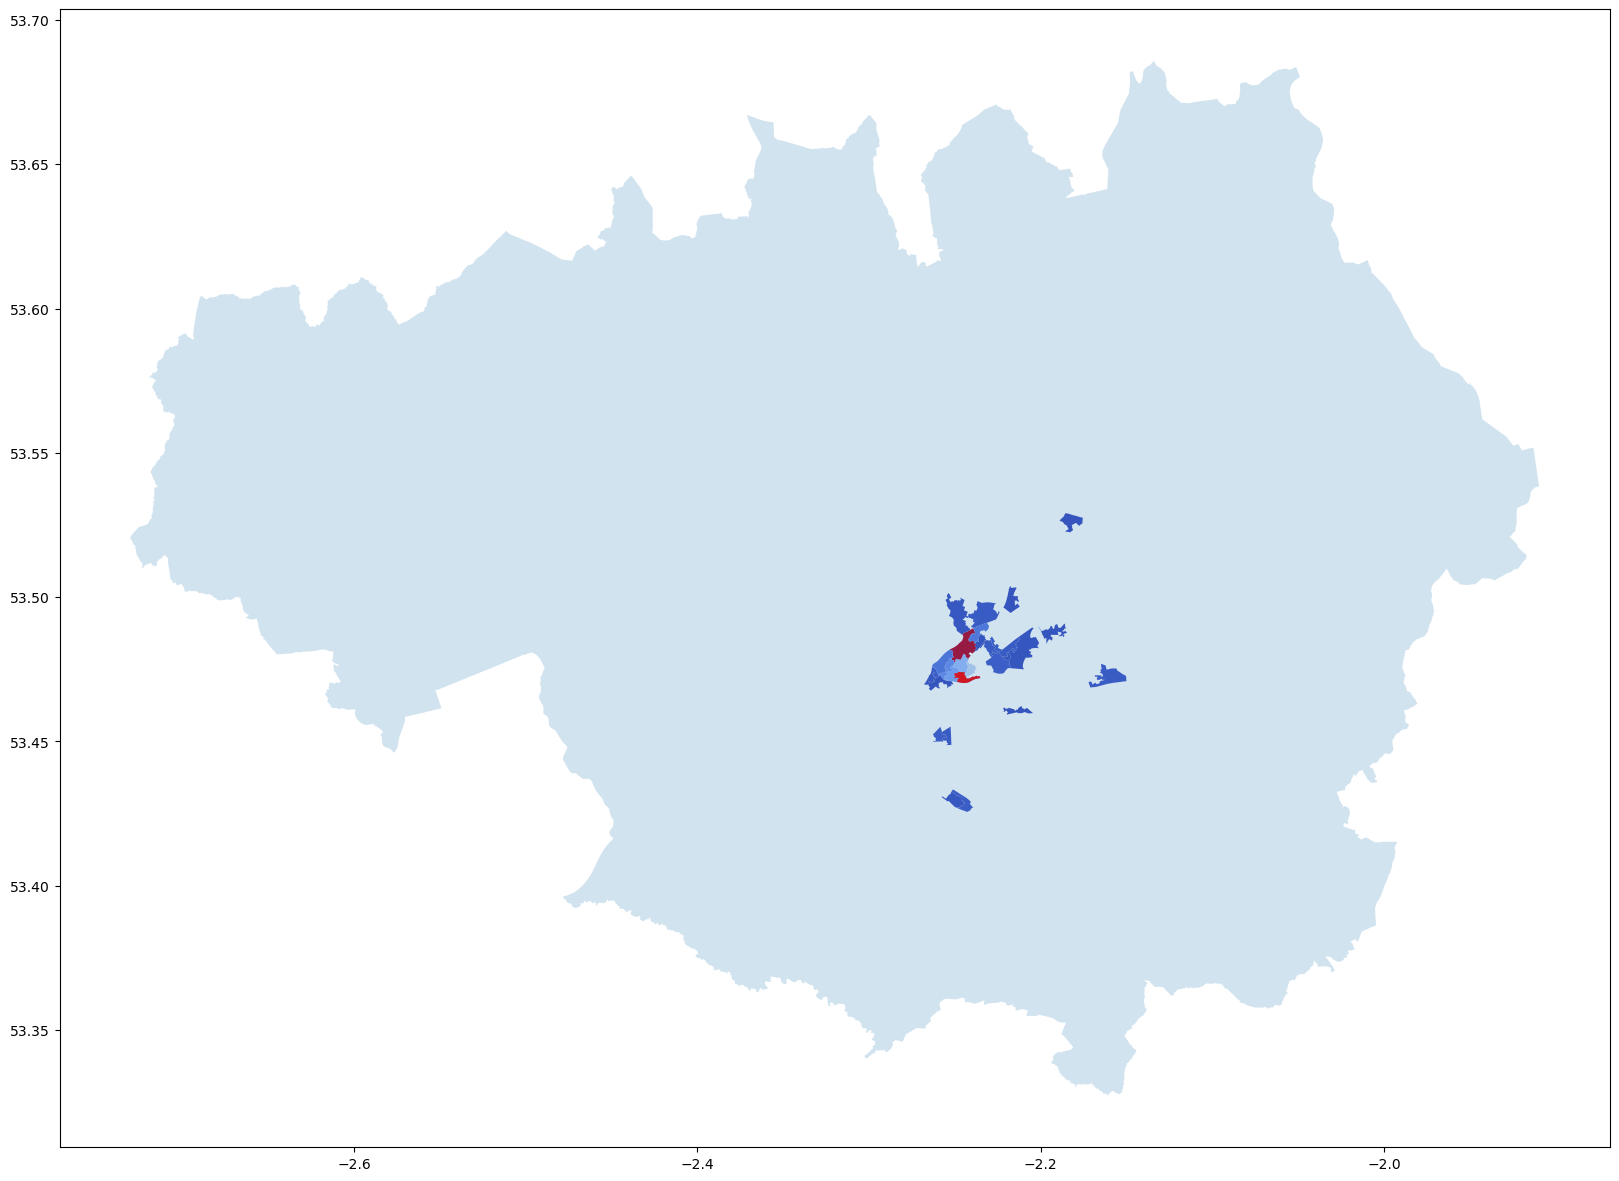

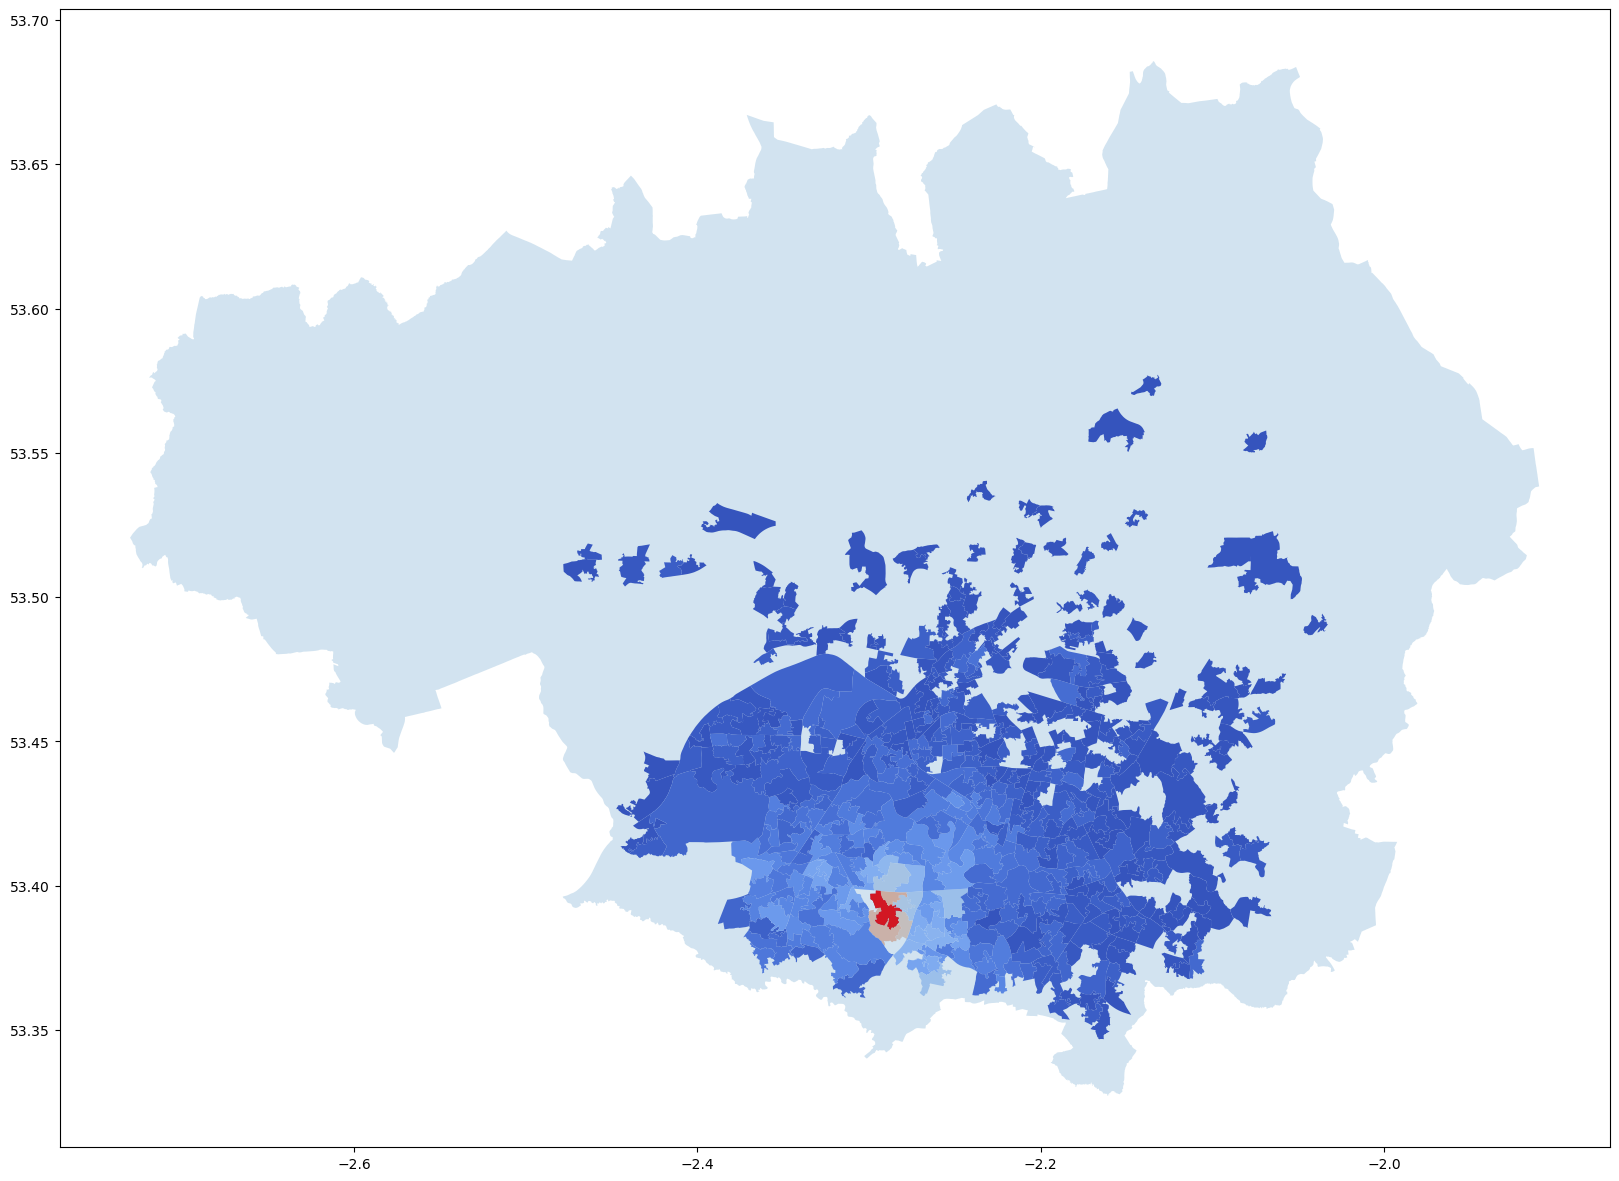

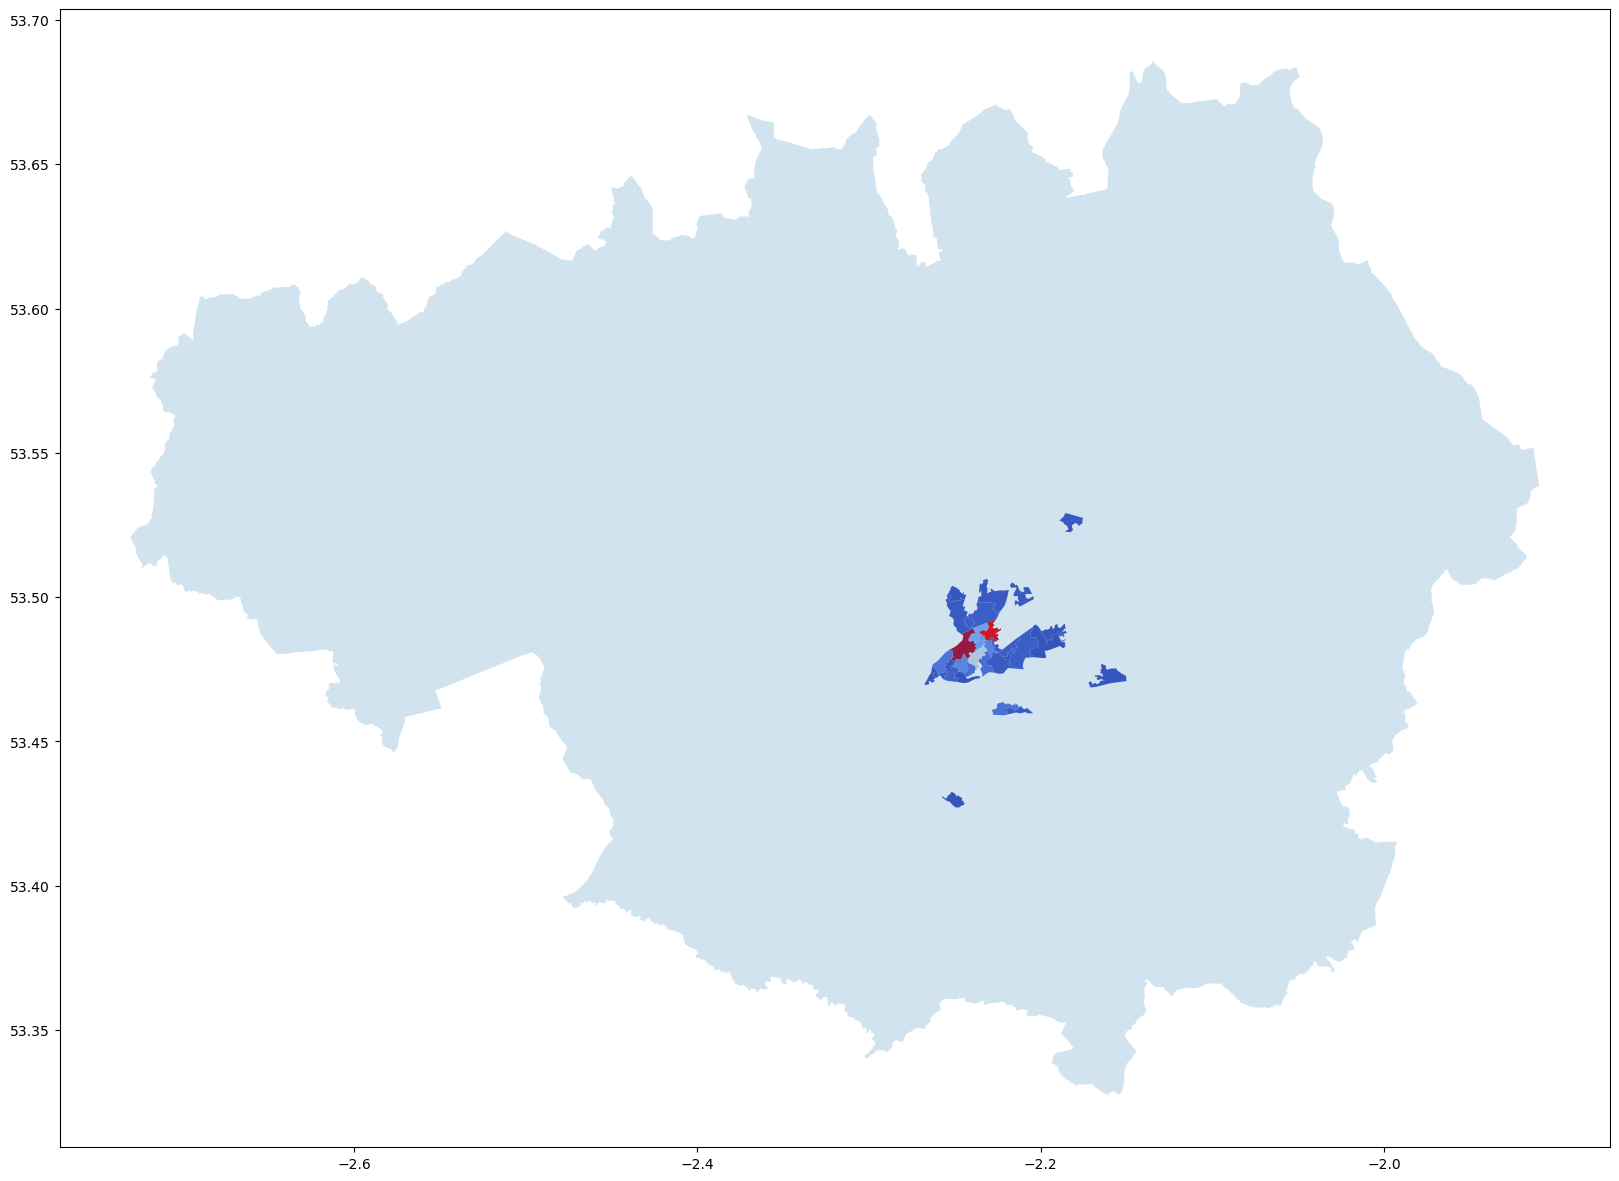

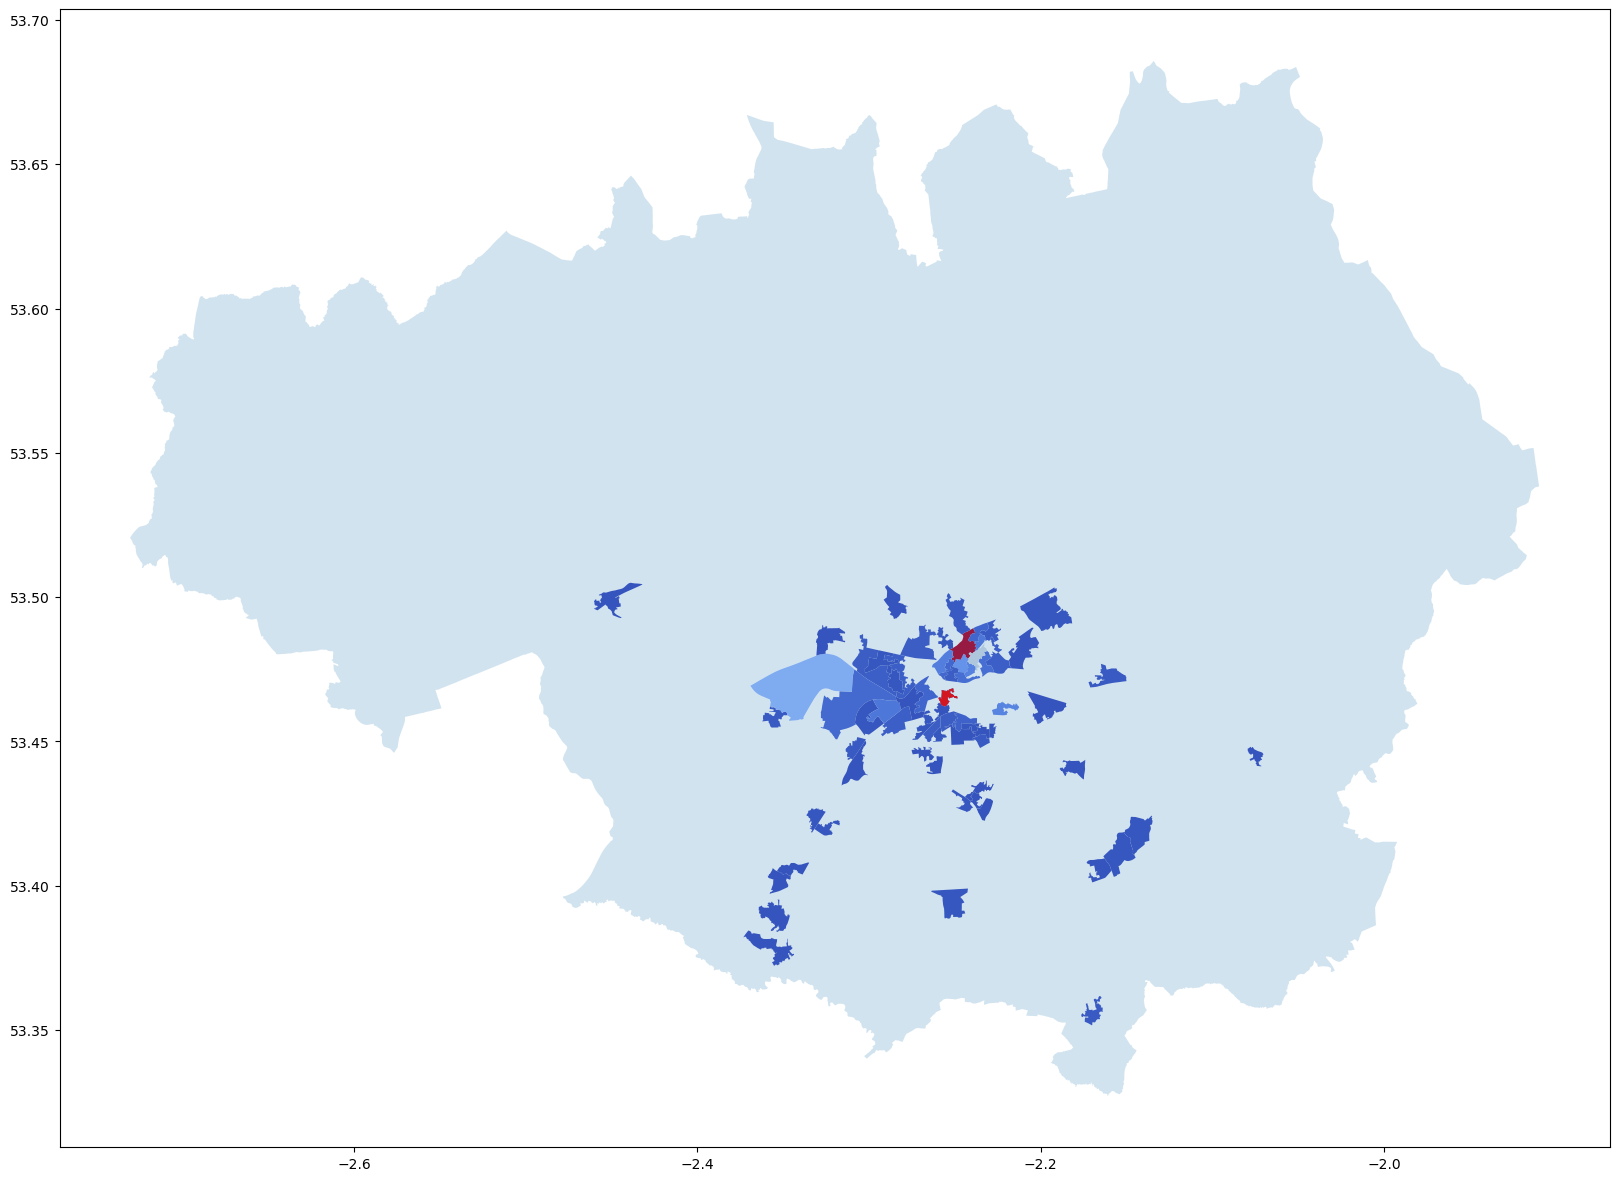

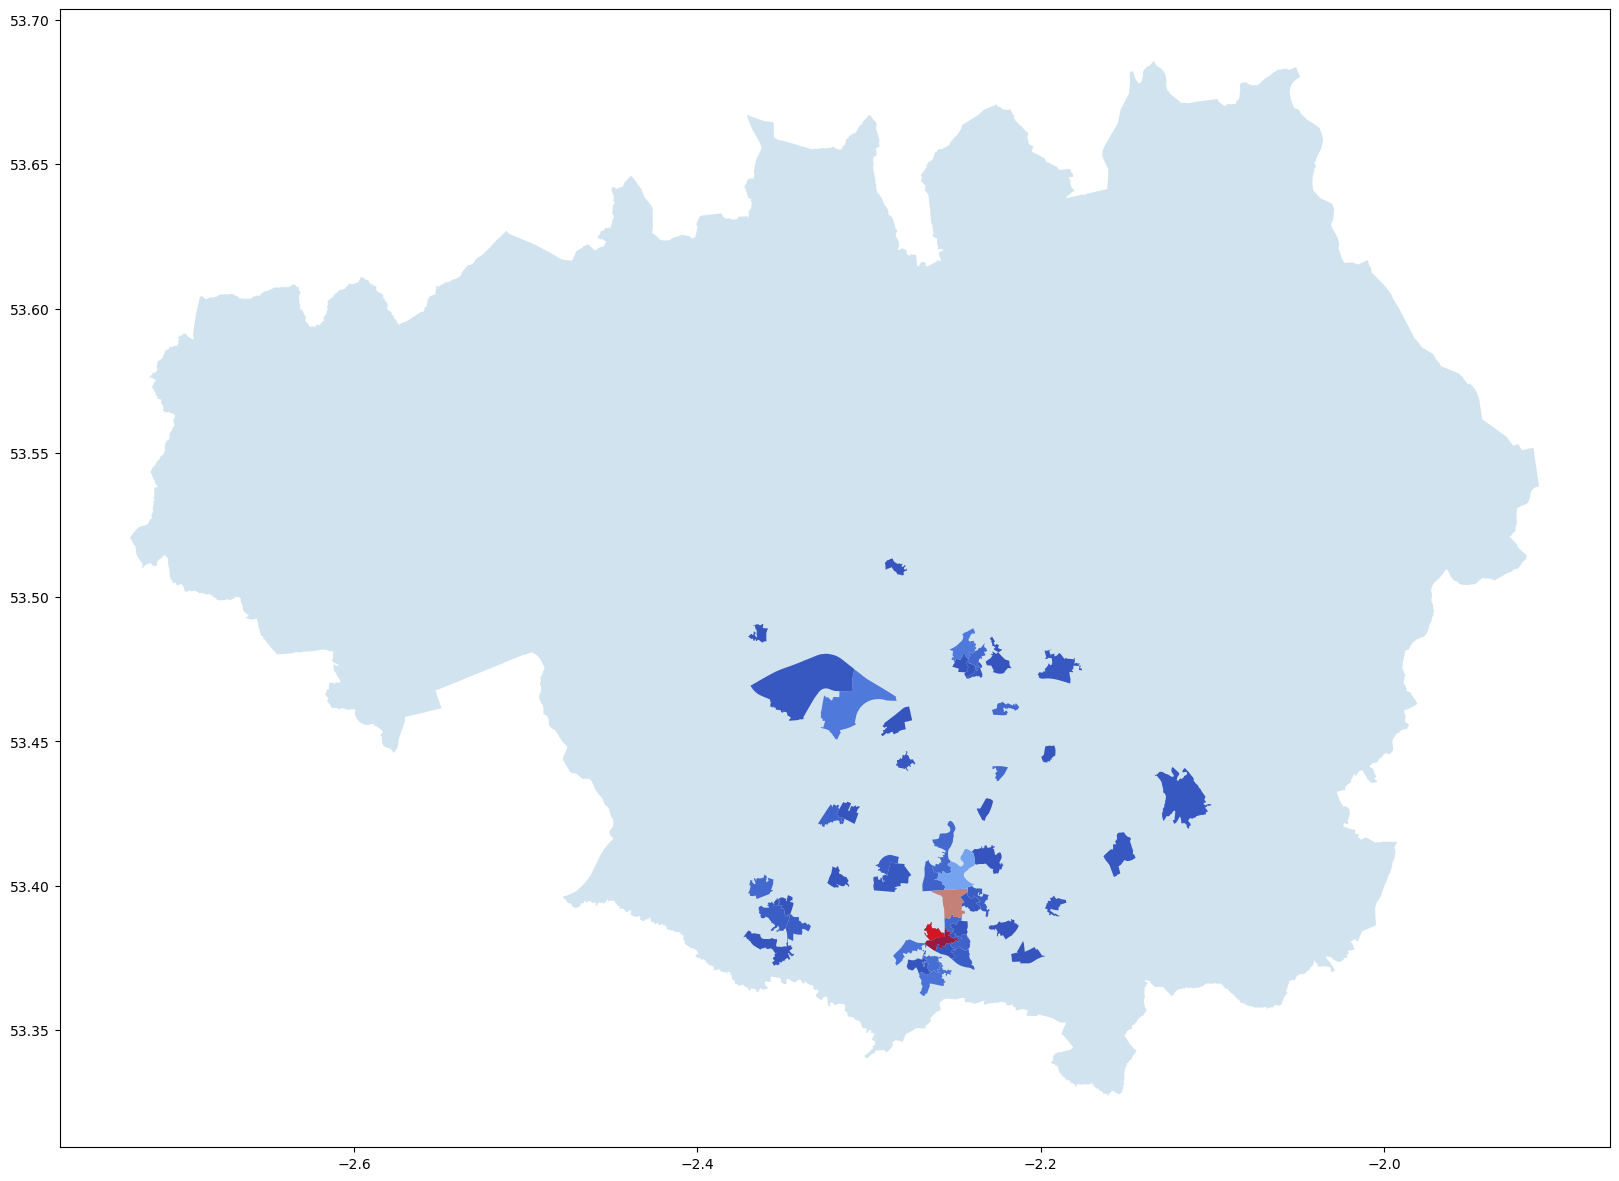

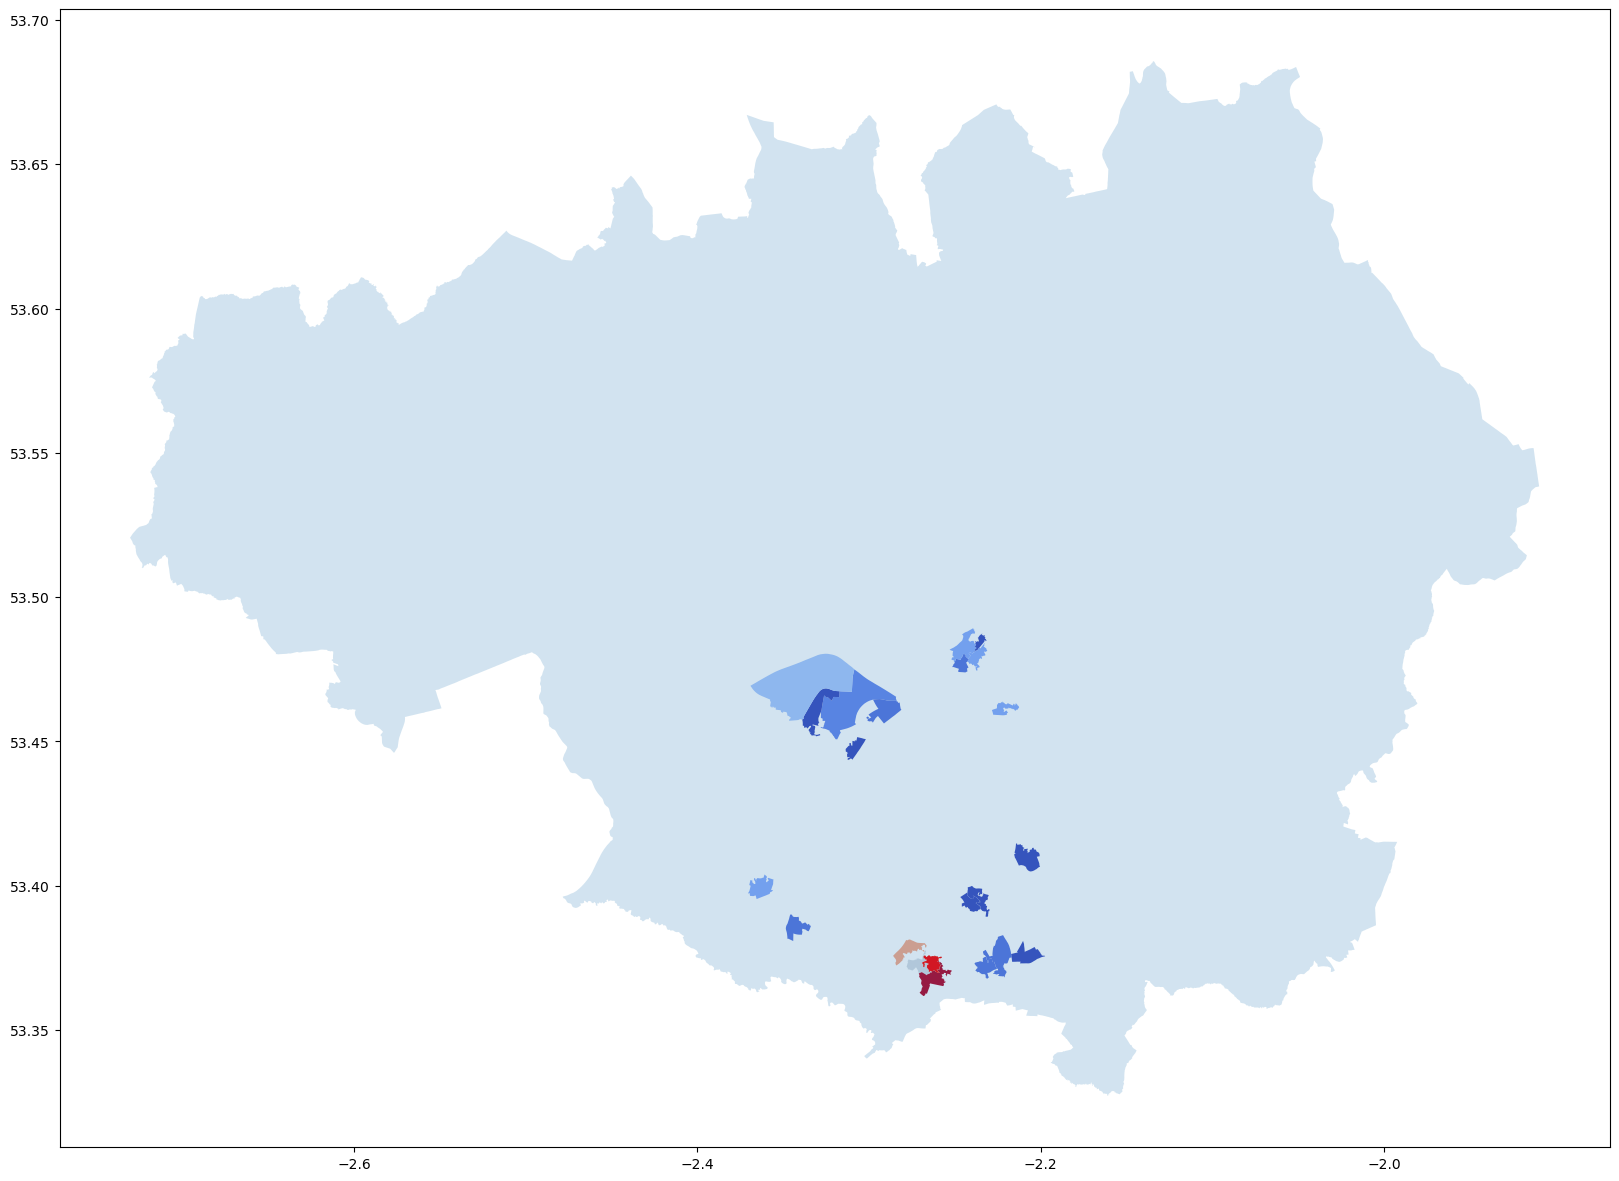

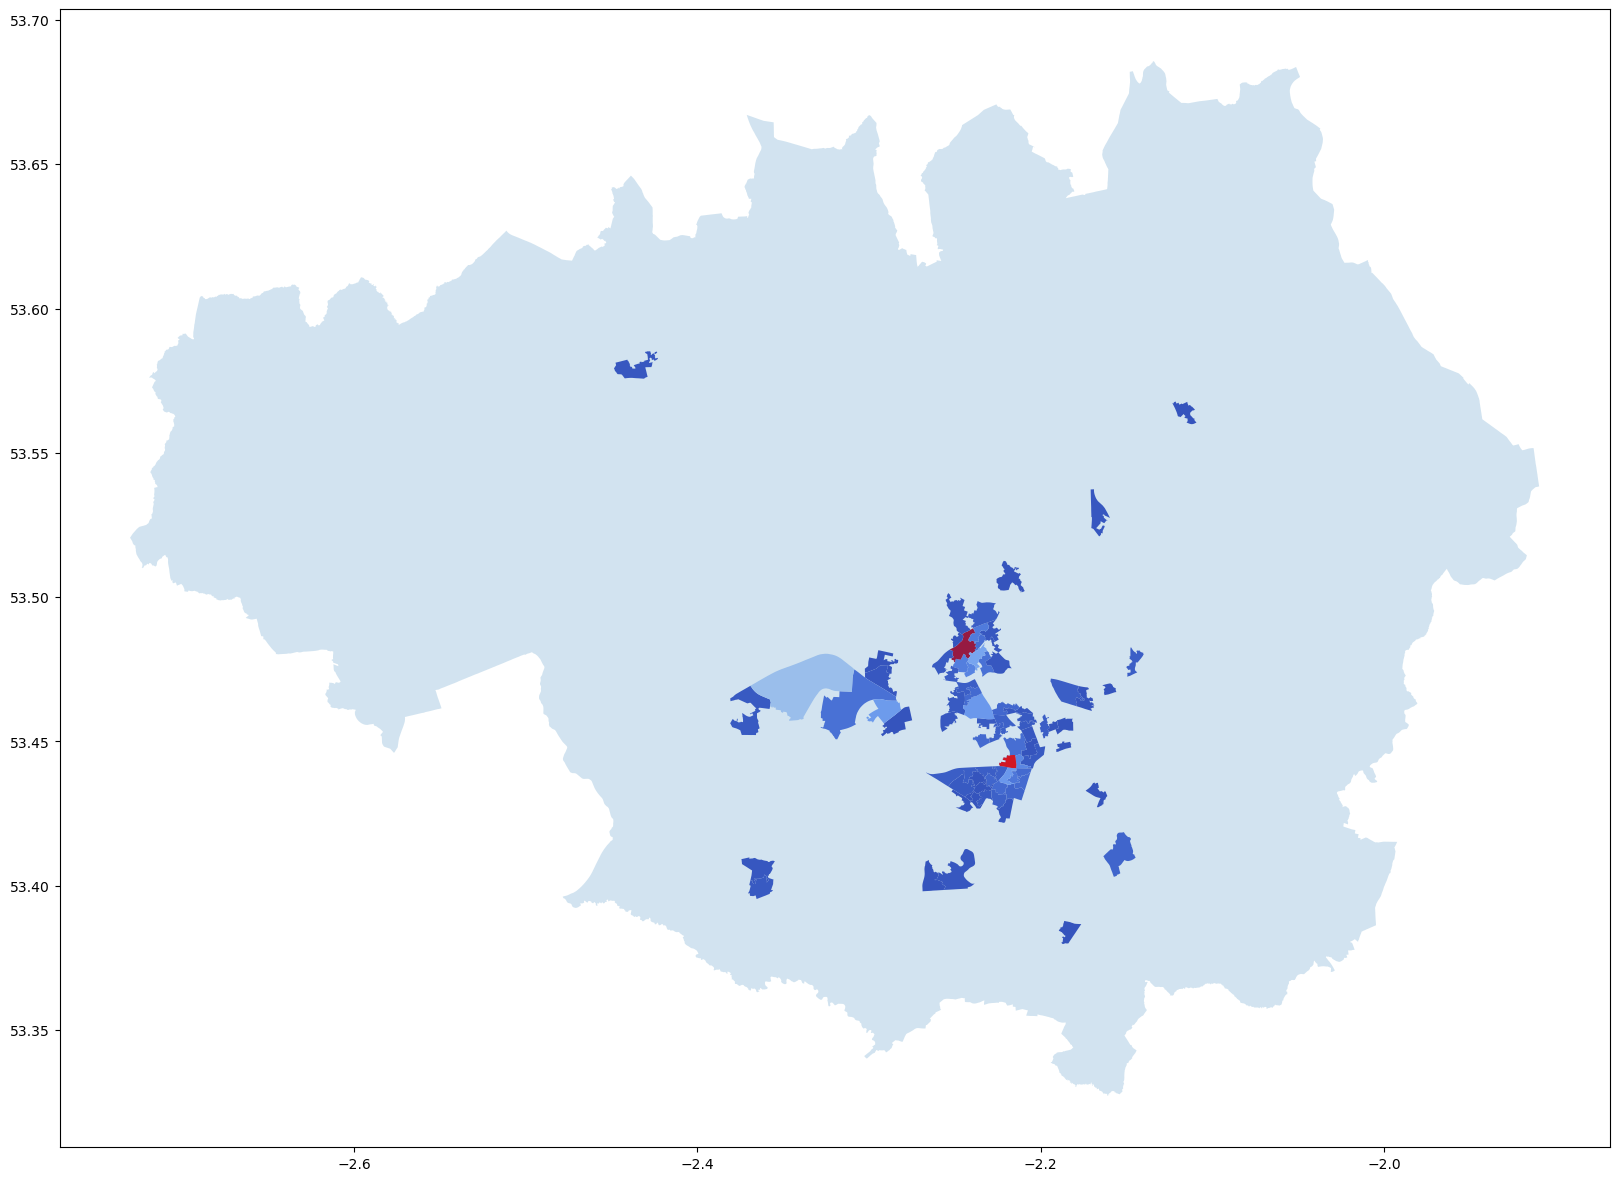

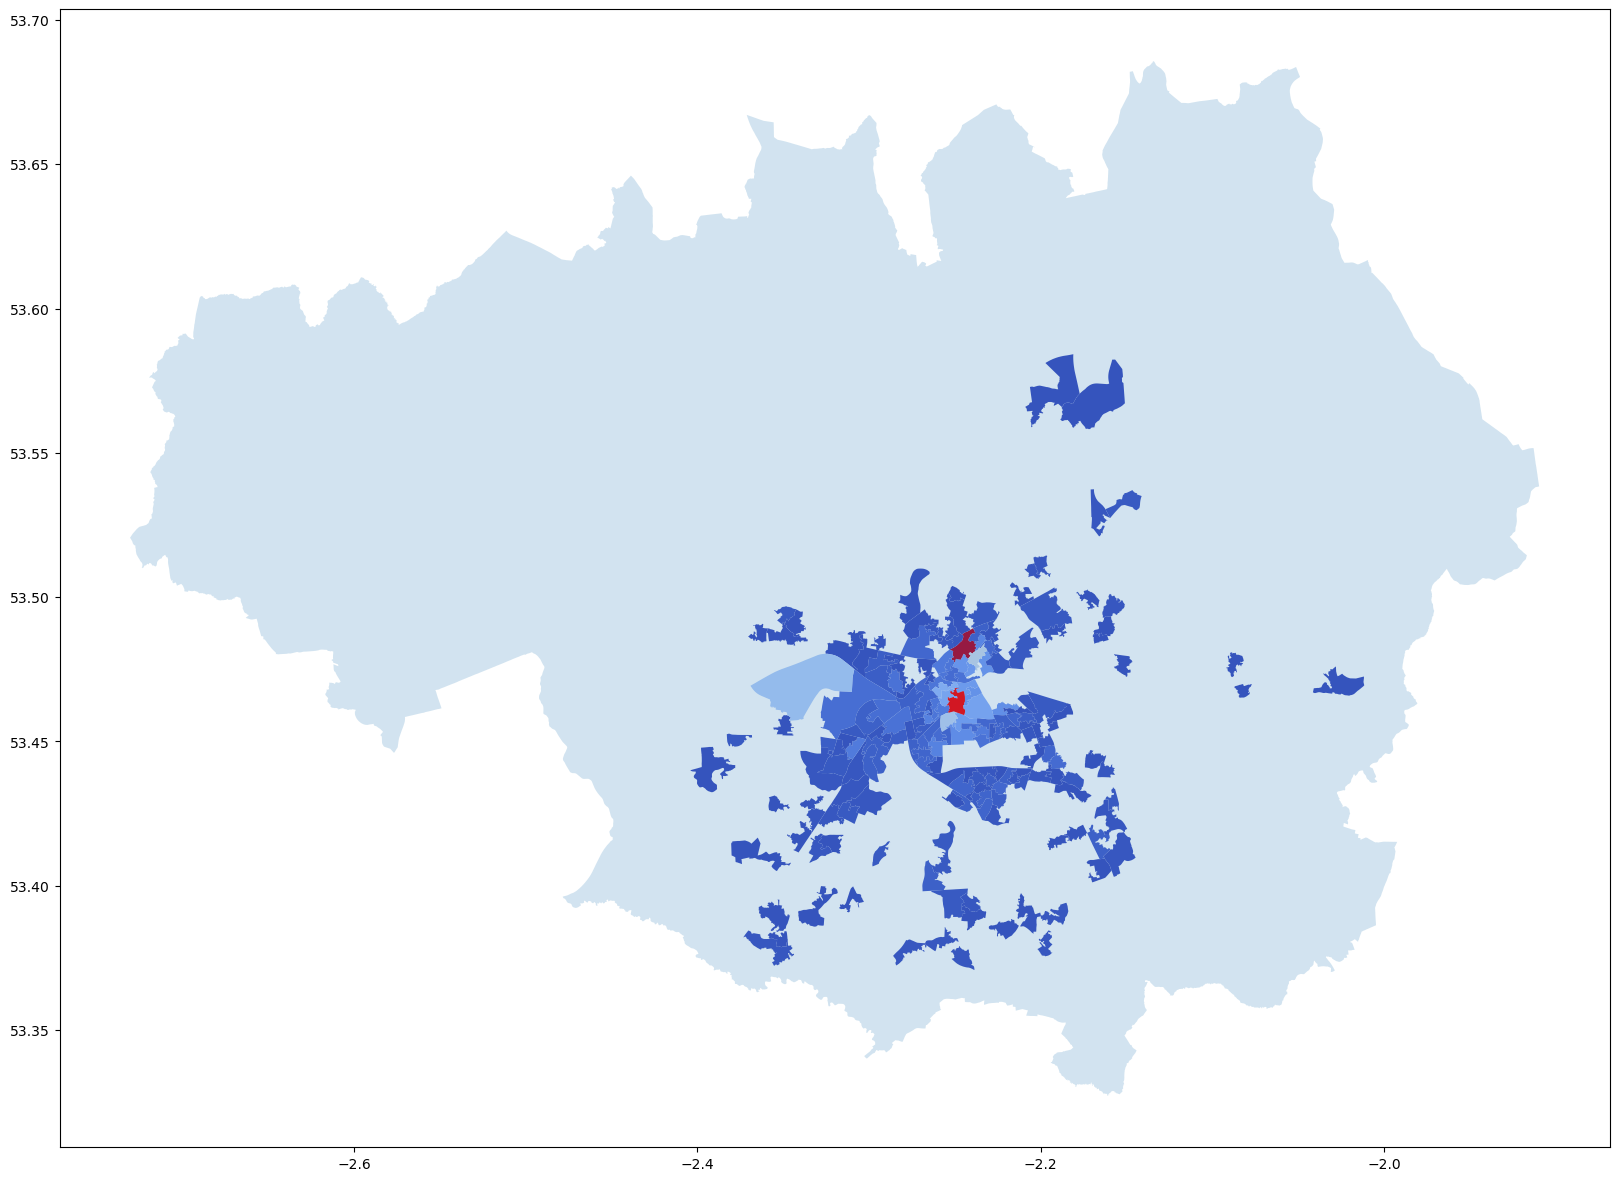

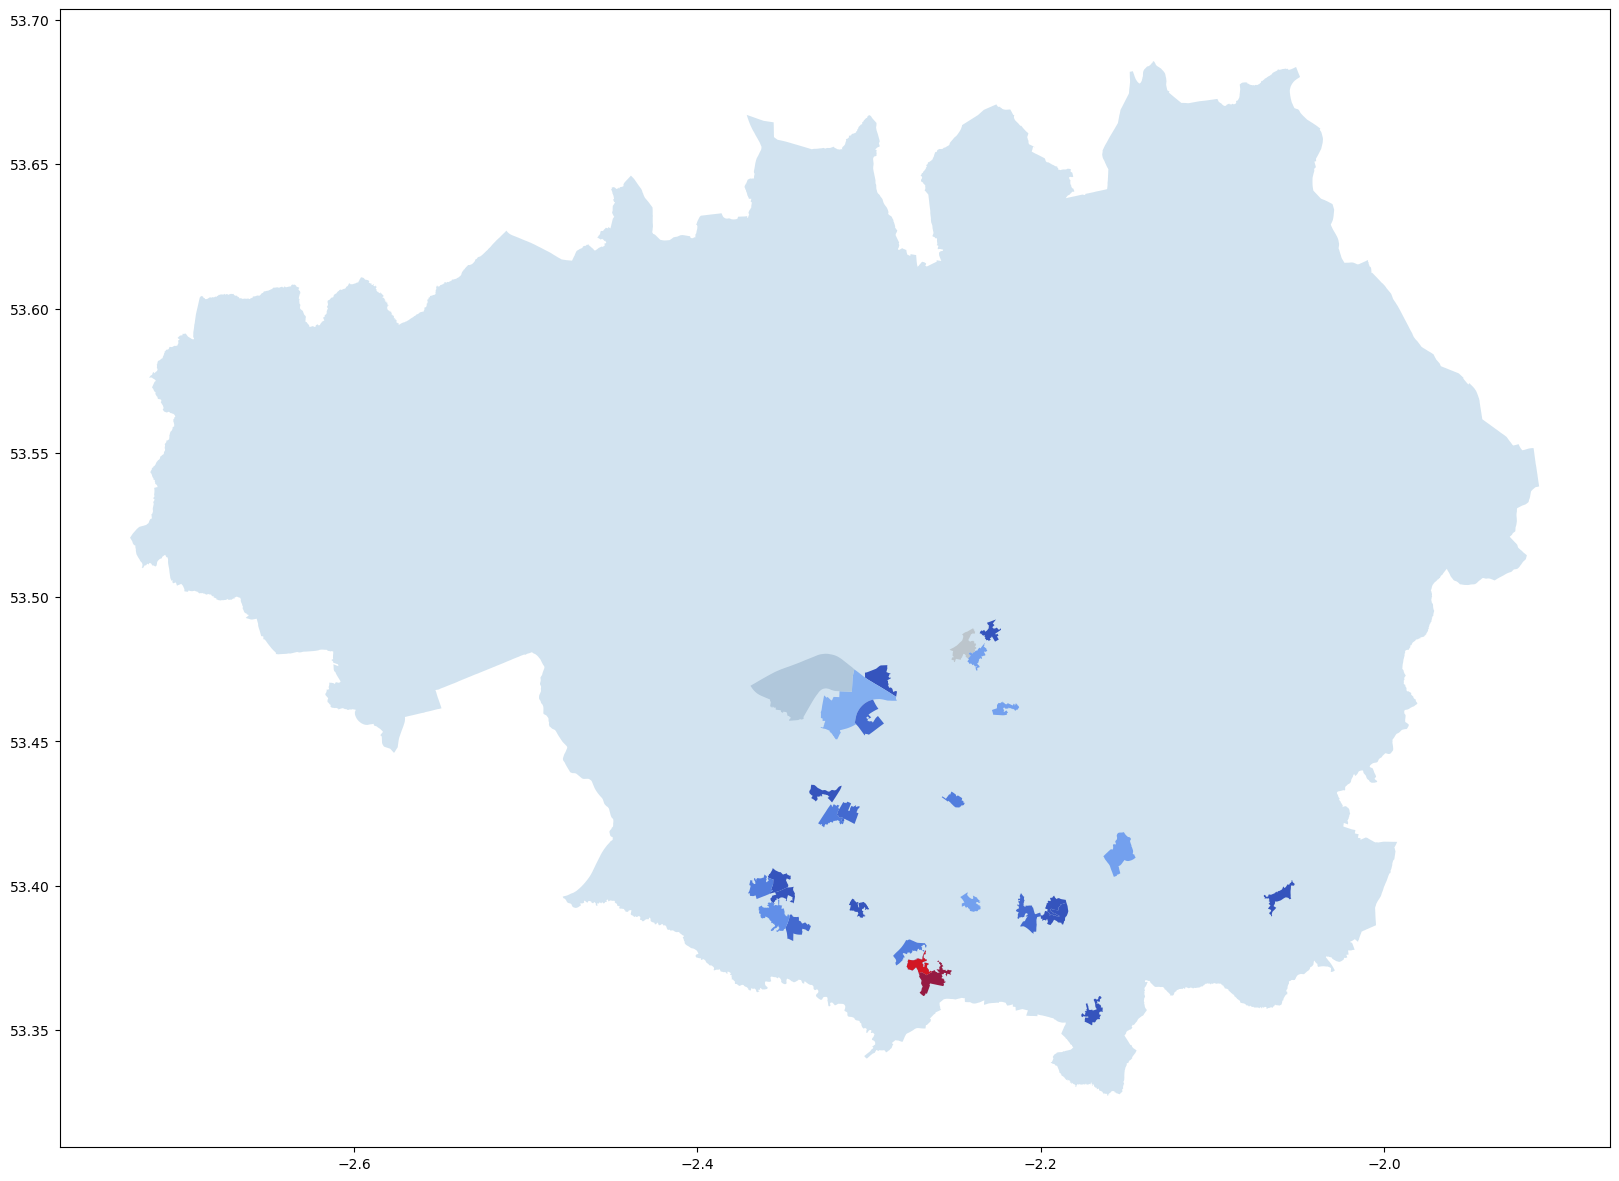

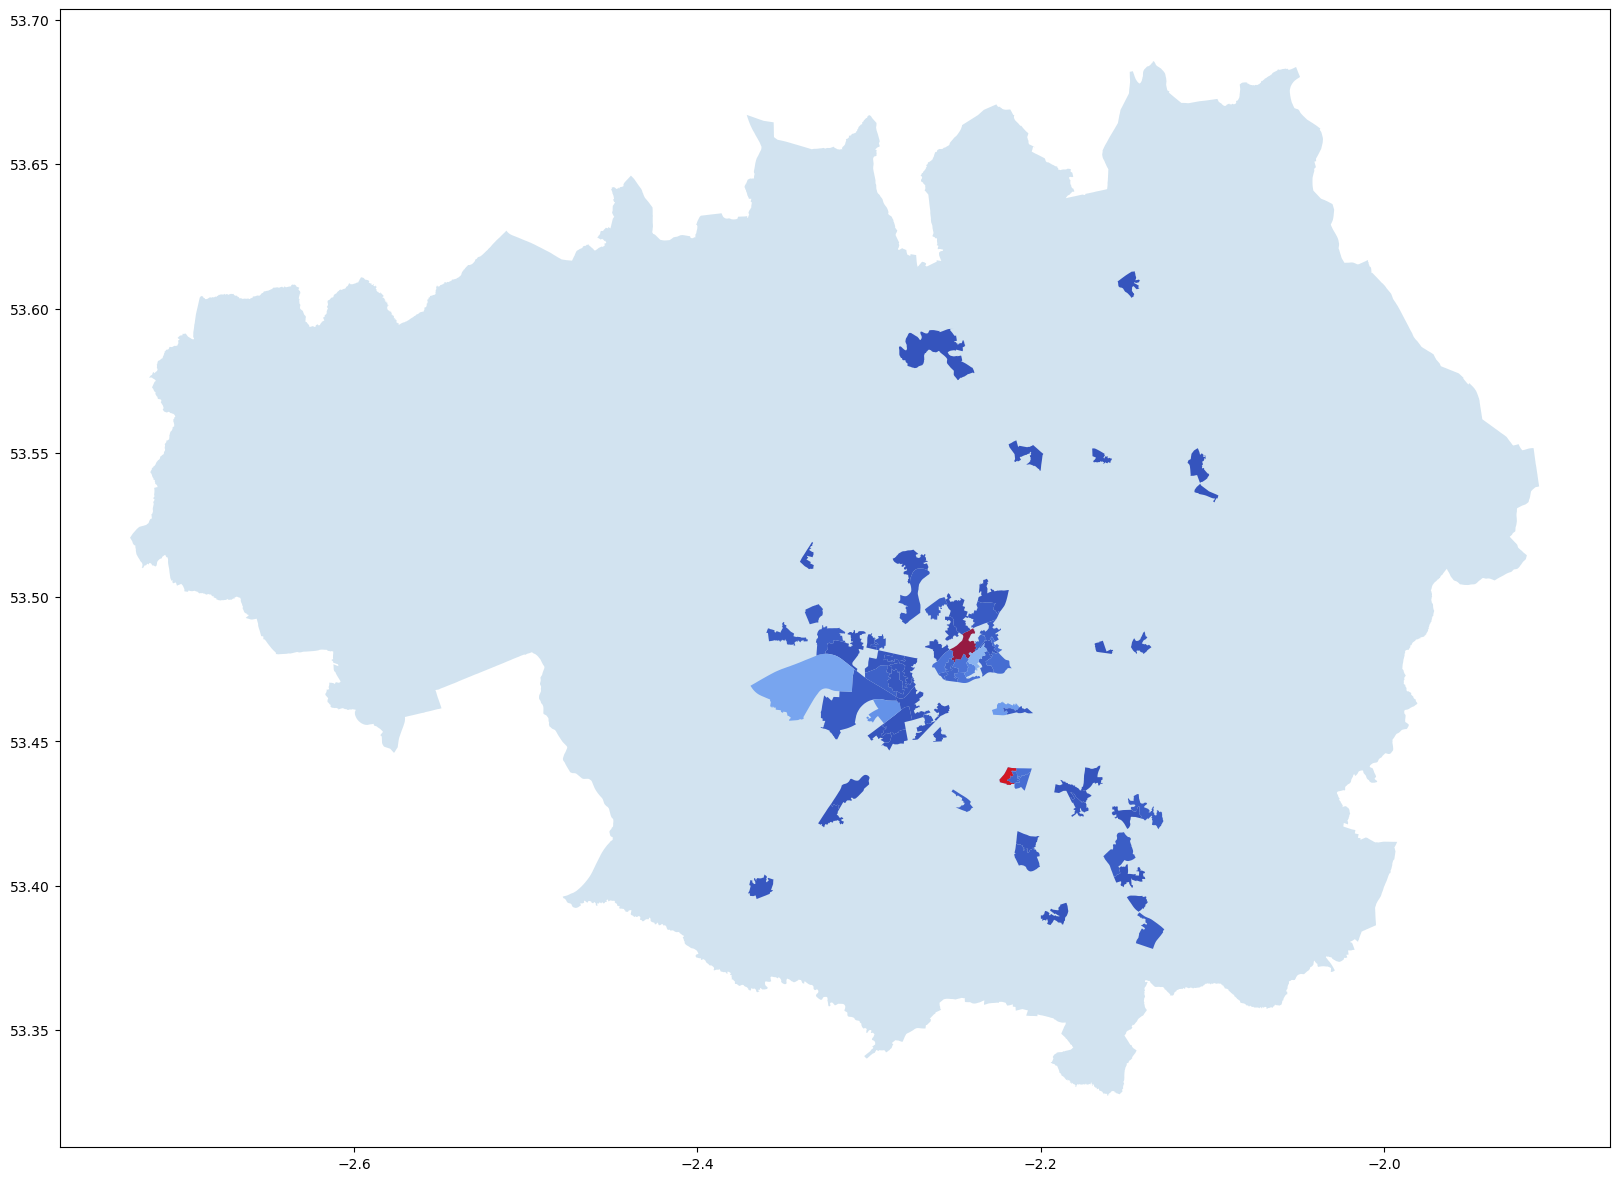

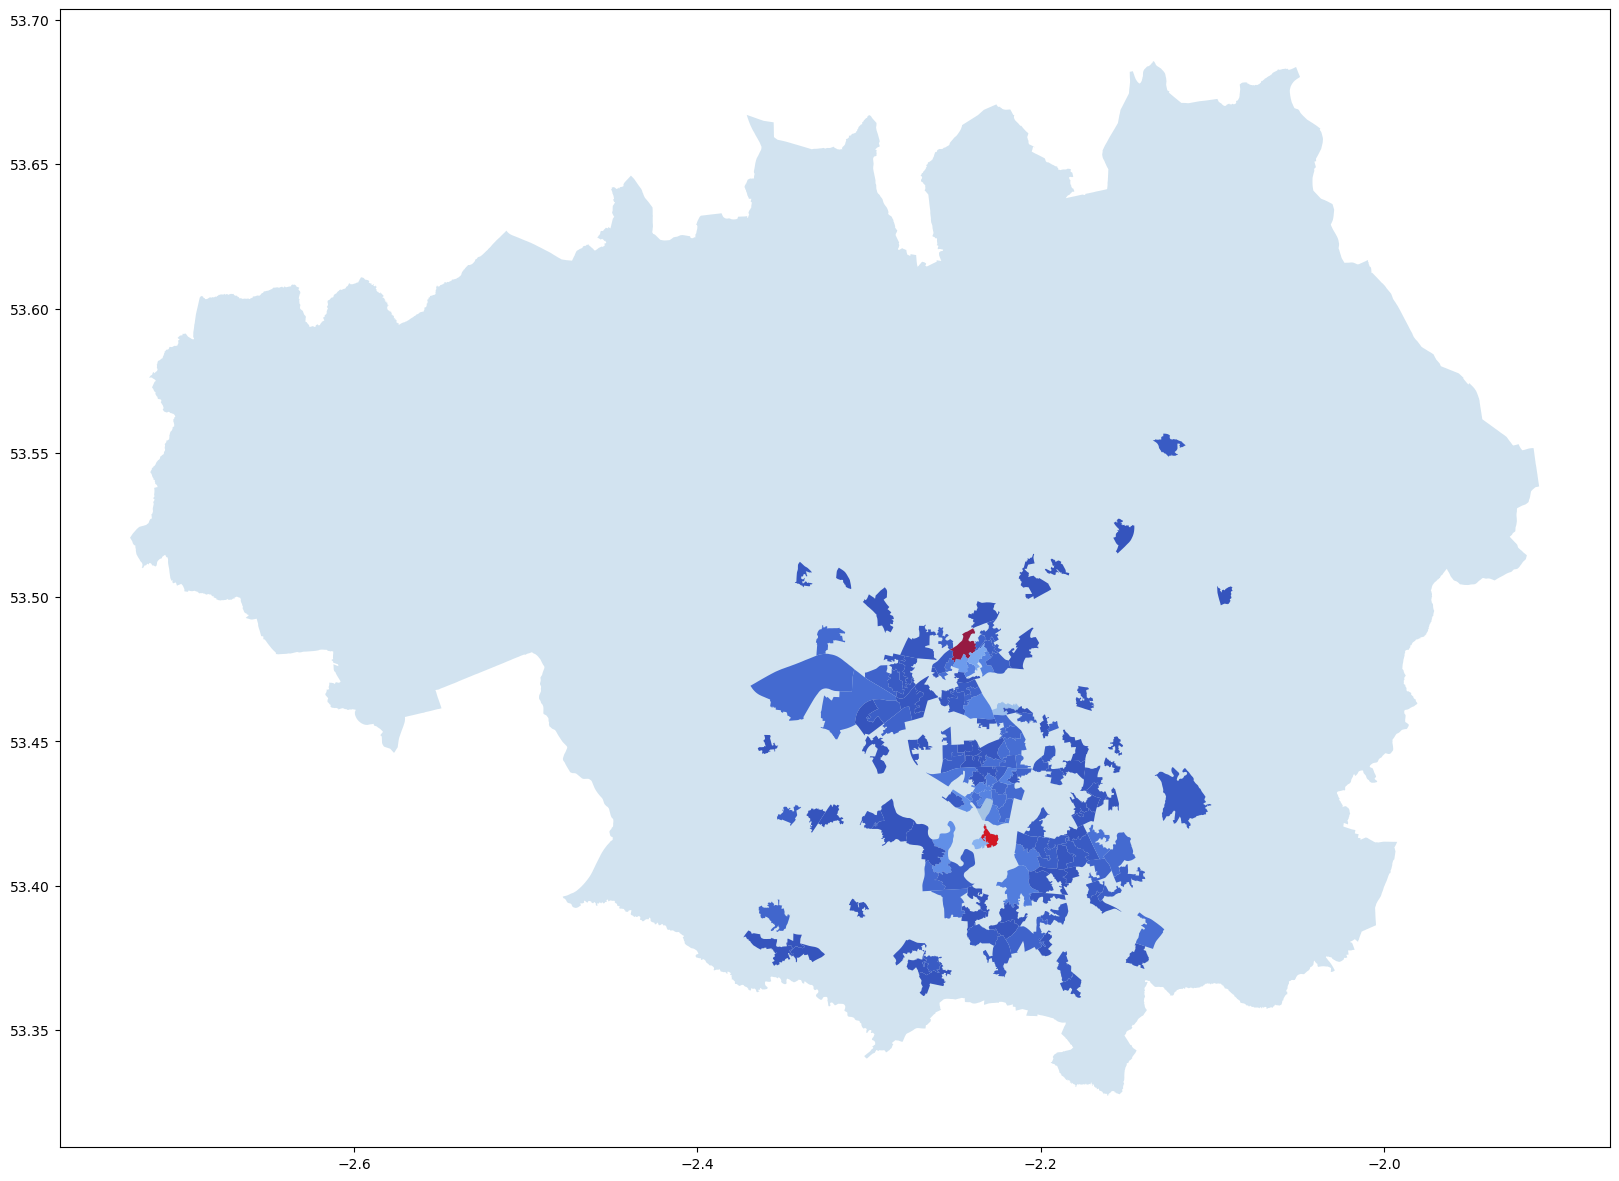

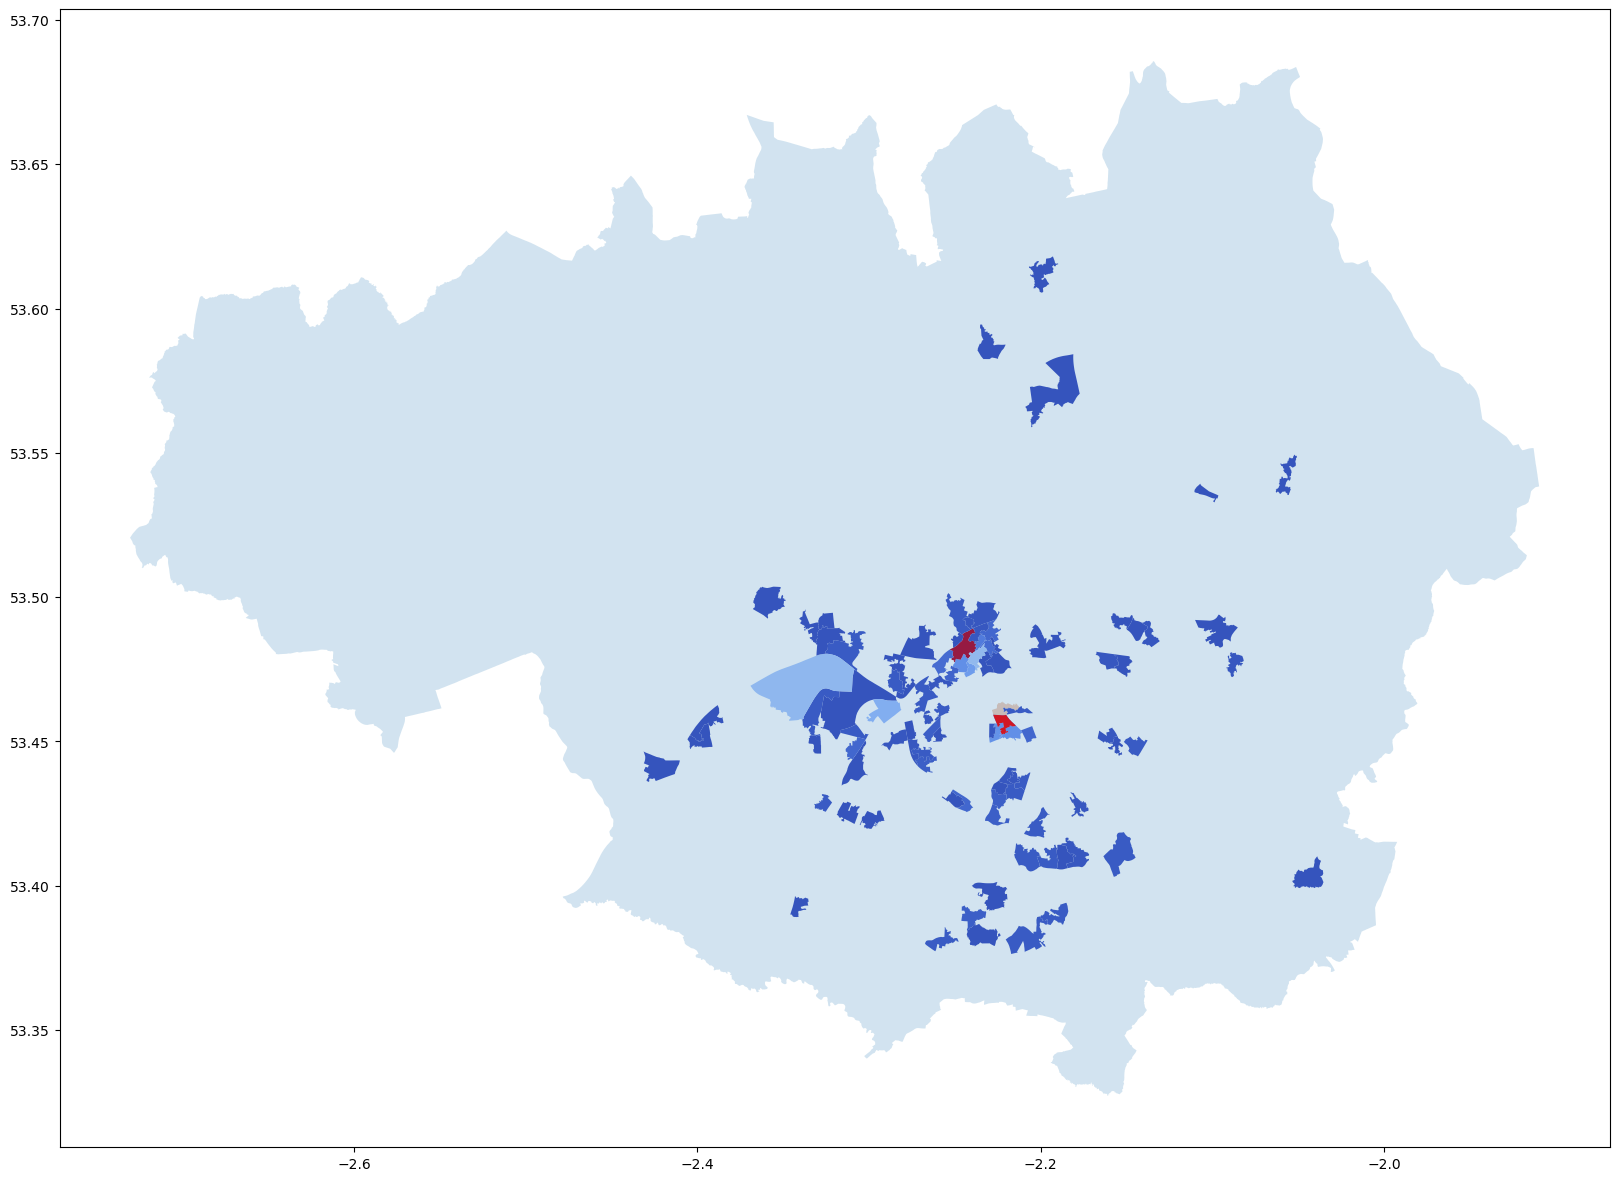

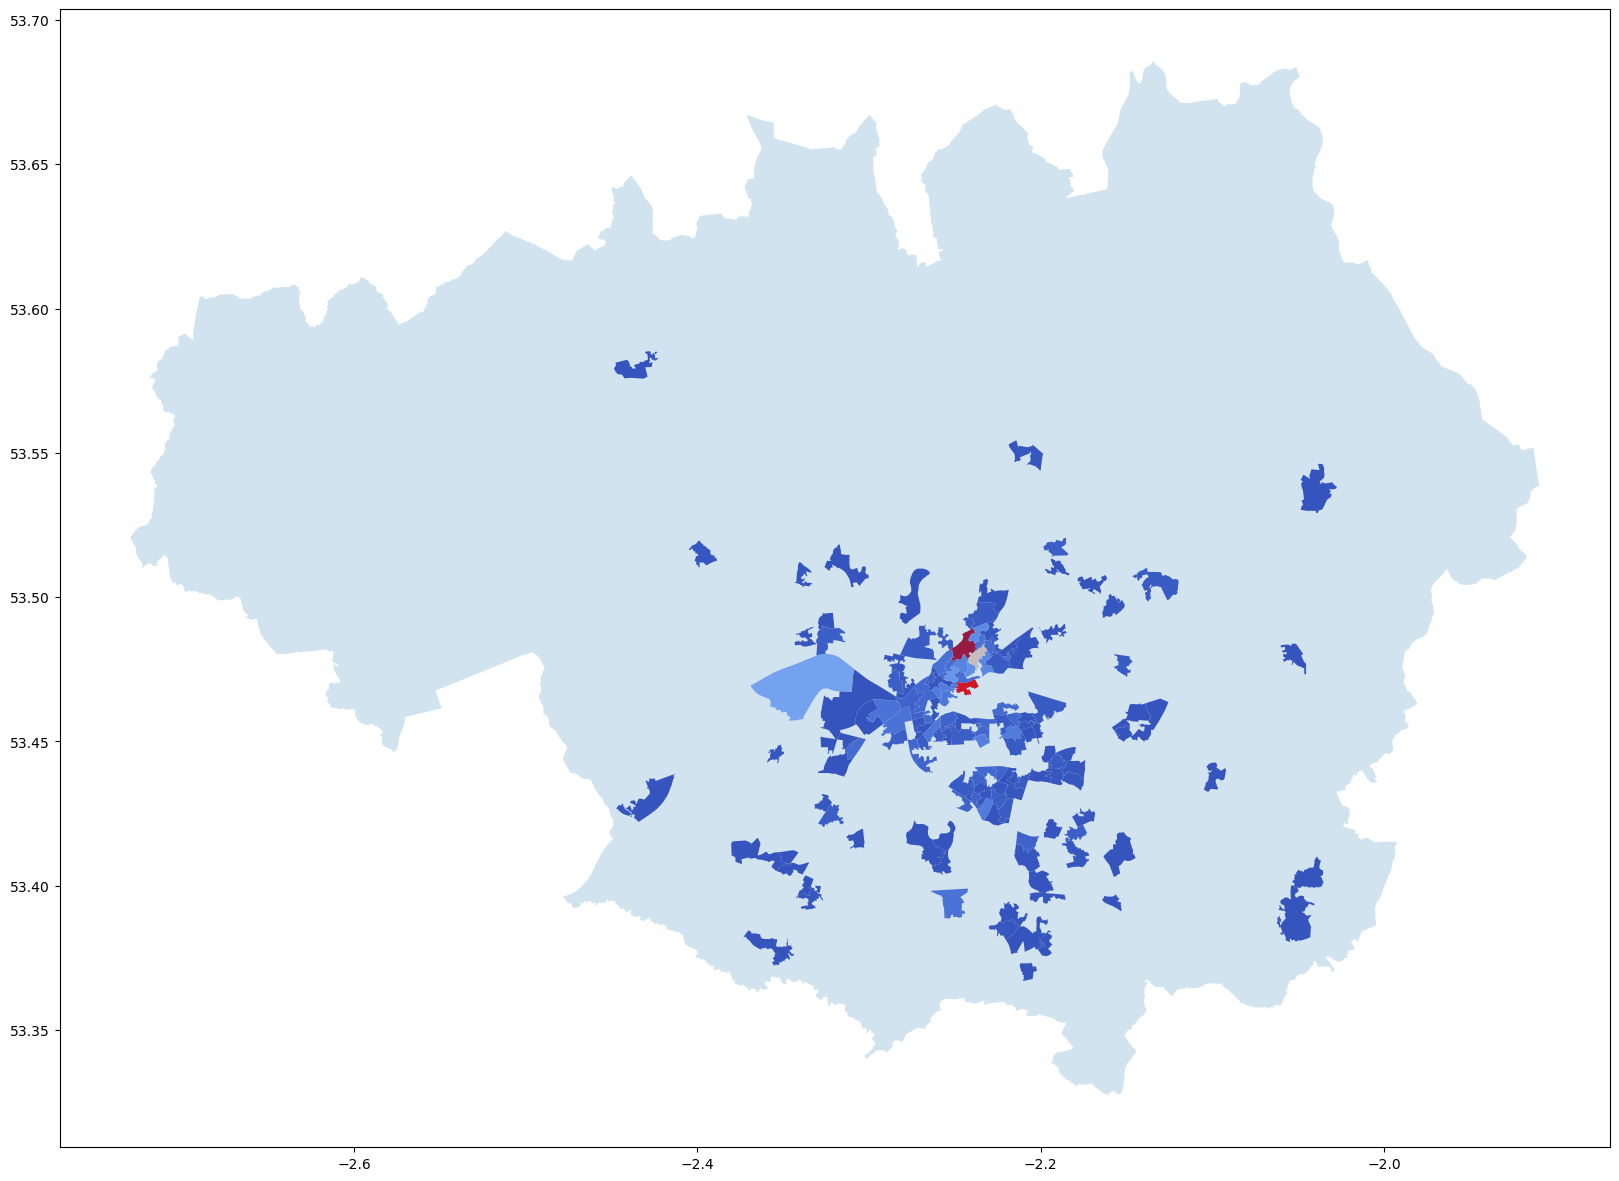

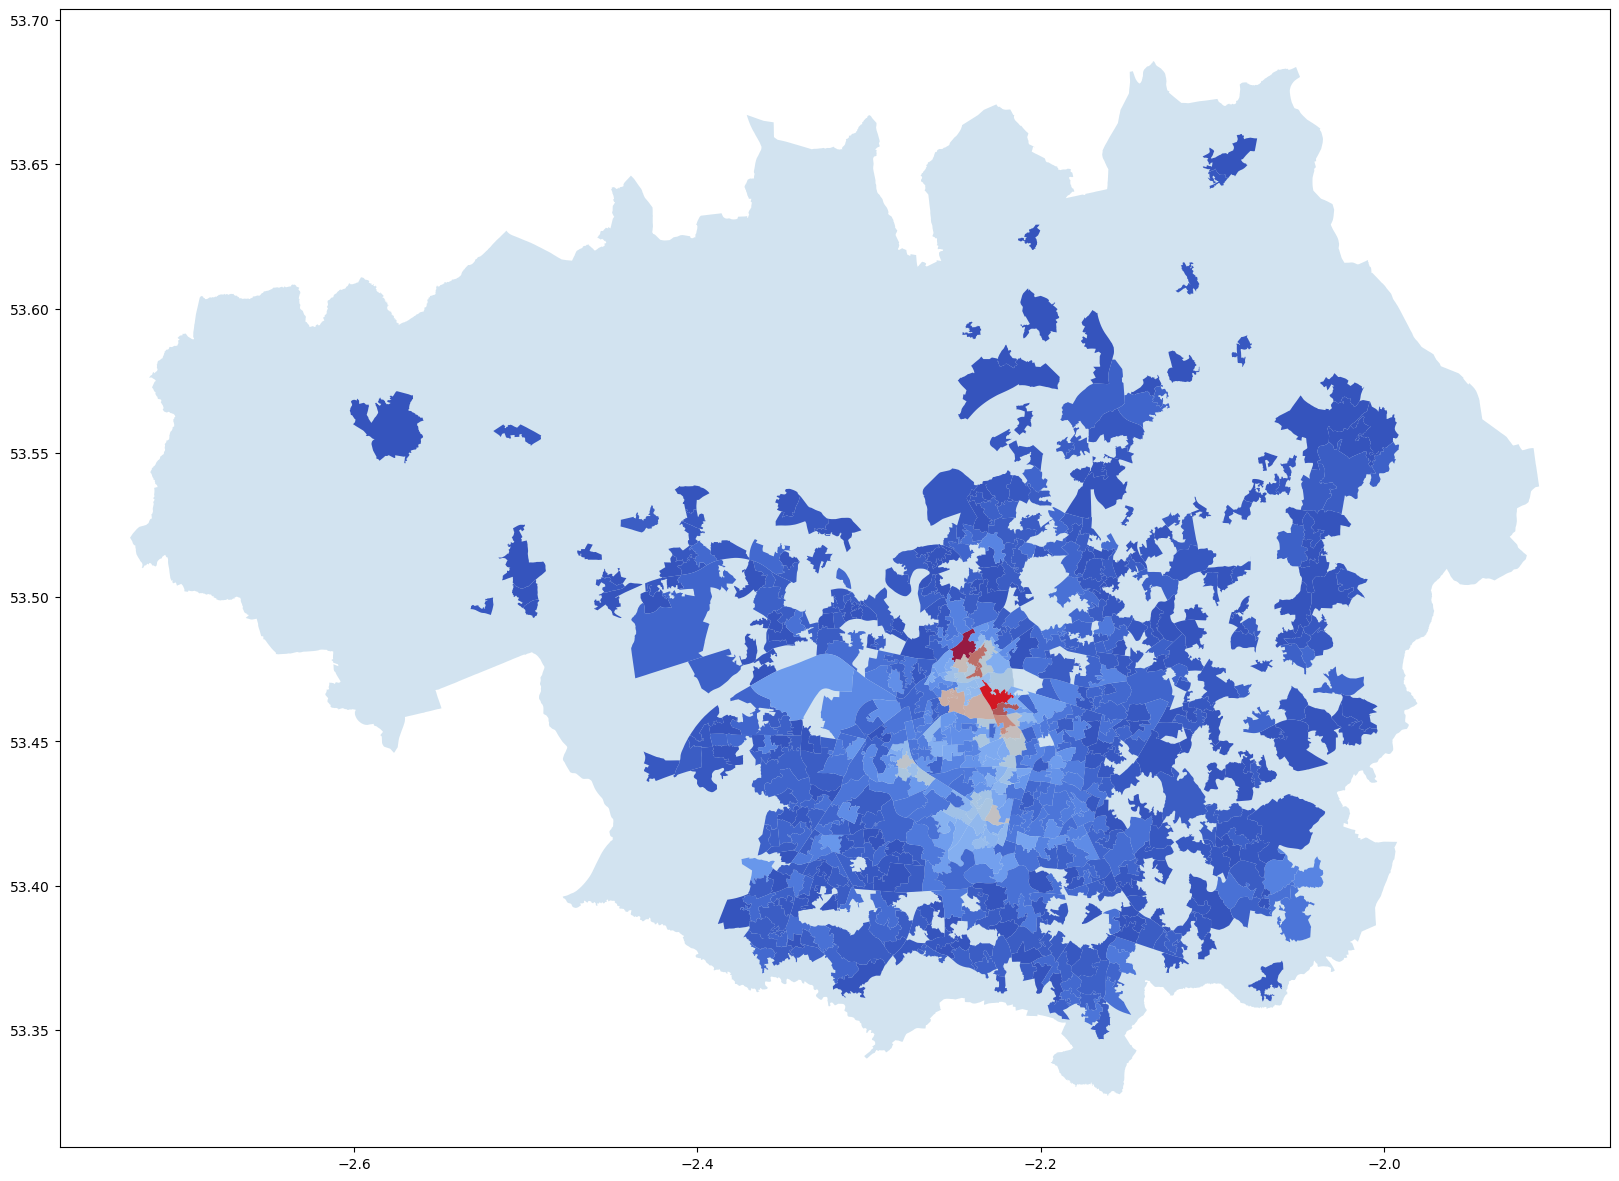

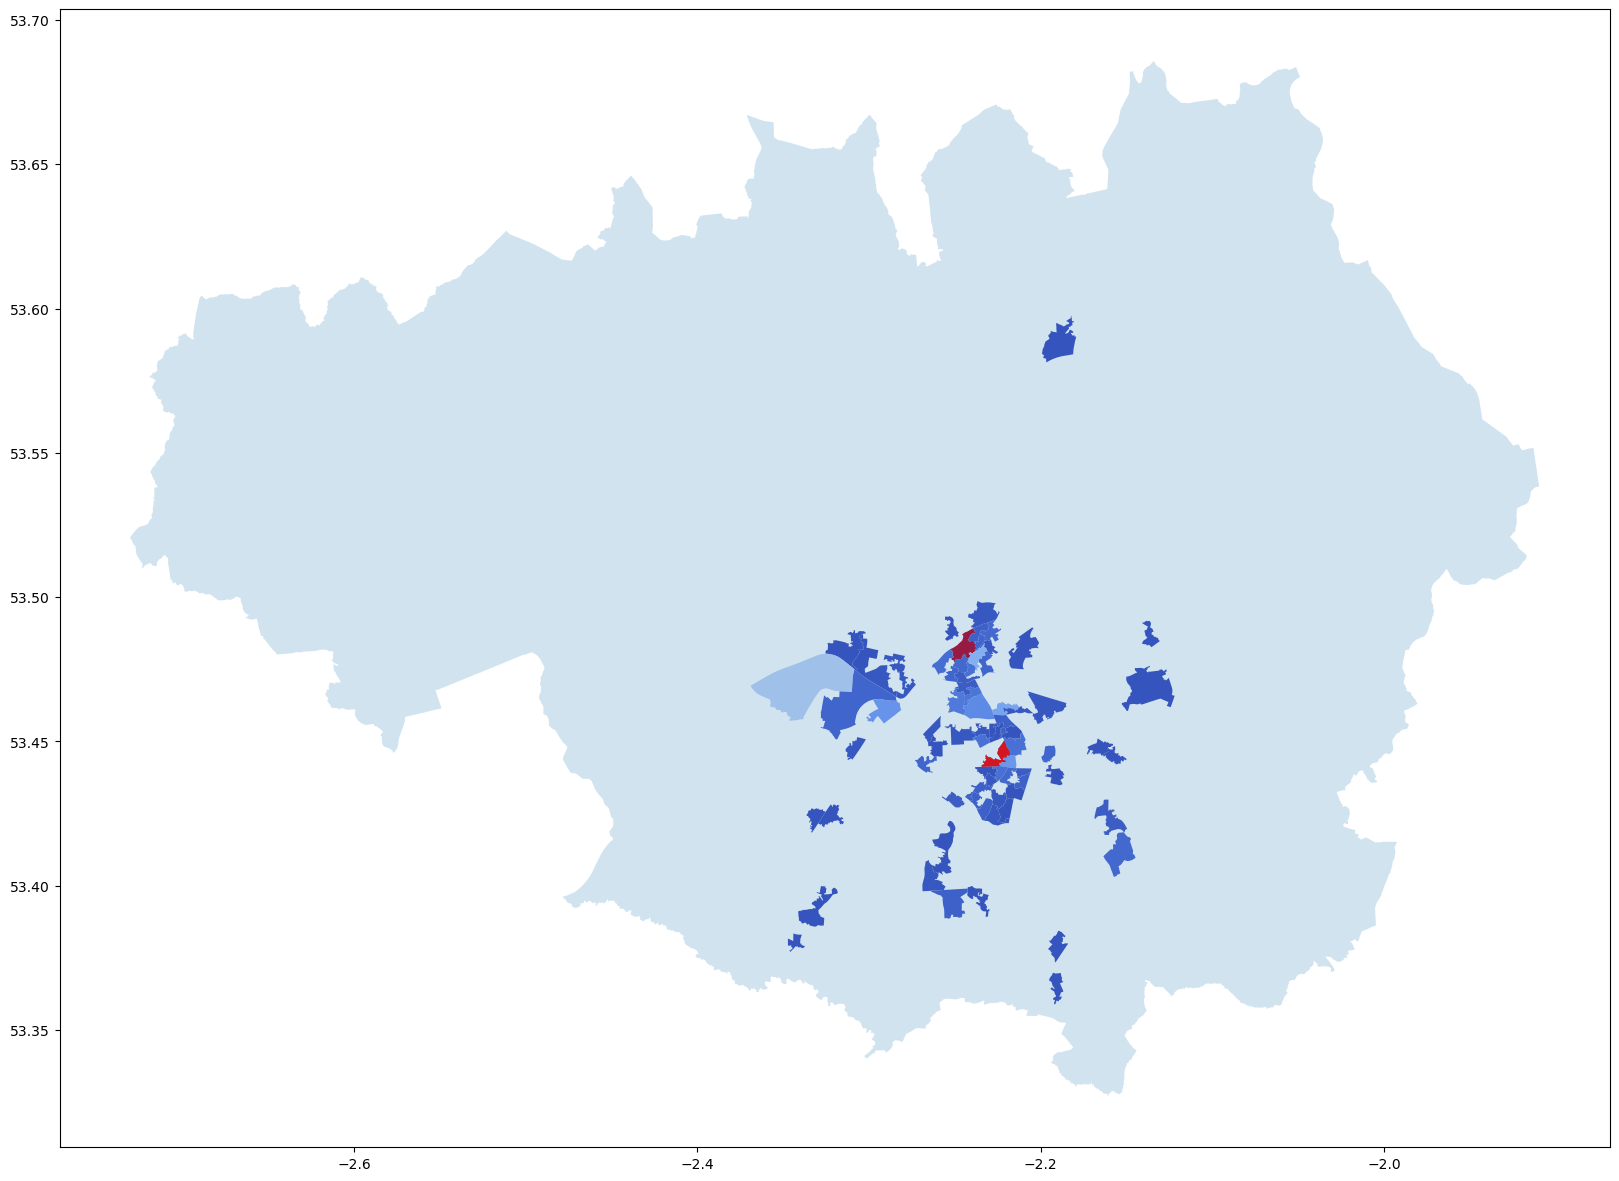

In [443]:
for i in range(20):
    plot_od_from(top_manch_routes_codes[i])

<Axes: >

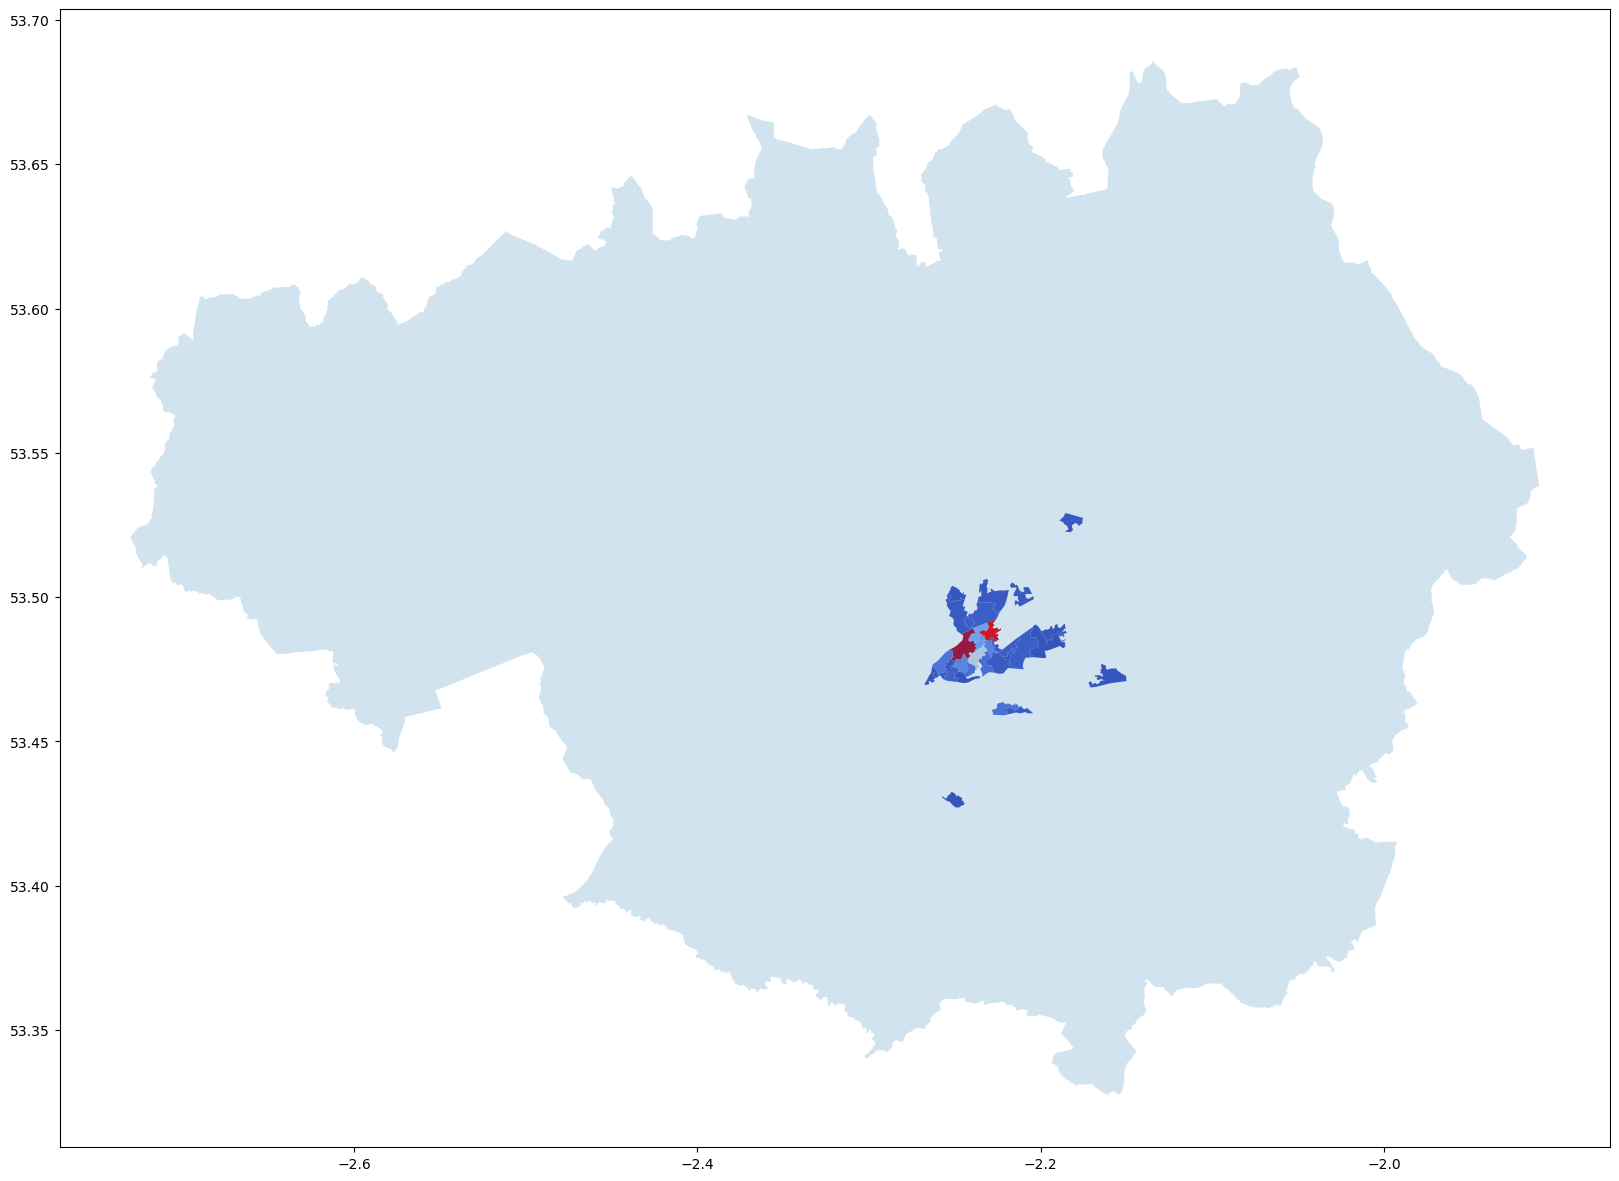

In [439]:
fig, ax = plt.subplots(1, 1, figsize=(20,20))

# np.random.shuffle(ix)
# ix = ix[:2000]
# lsoa_boundaries_gdf[lsoa_boundaries_gdf.to_crs(epsg=4326).apply(lambda x: x['LSOA21CD'] not in gm_geocodes and 
#                                                                 x['geometry'].within(gm_boundary_poly), axis=1)]\
# .to_crs(epsg=4326).plot(aspect=1, ax=ax)
lsoa_gm_boundary.plot(aspect=1, ax=ax, column='all', cmap='coolwarm', legend=False)
lsoa_boundaries_gdf[lsoa_boundaries_gdf['geo_code'] == from_code].to_crs(epsg=4326).plot(aspect=1, ax=ax, color='r')
gm_boundary.plot(ax=ax, alpha=0.2)

In [66]:
lsoa_gm_boundary = lsoa_boundaries_gdf[lsoa_boundaries_gdf['geo_code'].apply(lambda x: x in gm_geocodes)]
lsoa_gm_boundary = lsoa_gm_boundary.to_crs(epsg=4326)
gm_boundary_poly = gm_boundary['geometry'].iloc[0]
lsoa_gm_boundary = lsoa_gm_boundary[
    lsoa_gm_boundary['geometry'].apply(lambda x: x.within(gm_boundary_poly))
]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,20))

ix = np.arange(len(lsoa_gm_boundary))
np.random.shuffle(ix)
ix = ix[:2000]
lsoa_gm_boundary.iloc[ix].plot(ax=ax, alpha=0.5)
gm_boundary.plot(ax=ax, alpha=0.2)

In [ ]:
lsoa_boundaries_gdf.plot()